In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.manifold import MDS
import umap
import umap.plot
import numba
import pandas as pd
import seaborn as sns
from os.path import join
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr, data
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

dat_dir = "~/HPC_project/data"

In [3]:
df = pd.read_csv(join(dat_dir, 'dat_reg_semi_contiguous.csv'))
df

subject        date study_start_date treatment_start_date  \
0          3004  2020-12-09       2020-12-09           2021-02-03   
1          3004  2020-12-09       2020-12-09           2021-02-03   
2          3004  2020-12-09       2020-12-09           2021-02-03   
3          3004  2020-12-09       2020-12-09           2021-02-03   
4          3004  2020-12-09       2020-12-09           2021-02-03   
...         ...         ...              ...                  ...   
173170     3118  2022-11-12       2022-11-03           2023-01-18   
173171     3118  2022-11-12       2022-11-03           2023-01-18   
173172     3118  2022-11-12       2022-11-03           2023-01-18   
173173     3118  2022-11-12       2022-11-03           2023-01-18   
173174     3118  2022-11-12       2022-11-03           2023-01-18   

                  variable  value     modality  
0           ASIQ9_wishdead    1.0  self_report  
1                wishsleep    2.0  self_report  
2        ASIQ2_thoughtkill    1.0  self_report  
3       ASIQ16_thoughtways    1.0  self_report  
4        ASIQ4_thoughtwhen    1.0  self_report  
...                    ...    ...          ...  
173170               BITe4    1.0  self_report  
173171               BITe5    1.0  self_report  
173172         PANAS_happy    1.0  self_report  
173173          belonging_    3.0  self_report  
173174             mastery    2.0  self_report  

[173175 rows x 7 columns]

In [4]:
df_sr = df[df['modality'] == 'self_report']
df_sr = df_sr[['subject', 'date', 'variable', 'value', 'modality']]
df_sr['logged'] = np.log(df_sr['value'])
df_sr

subject        date            variable  value     modality    logged
0          3004  2020-12-09      ASIQ9_wishdead    1.0  self_report  0.000000
1          3004  2020-12-09           wishsleep    2.0  self_report  0.693147
2          3004  2020-12-09   ASIQ2_thoughtkill    1.0  self_report  0.000000
3          3004  2020-12-09  ASIQ16_thoughtways    1.0  self_report  0.000000
4          3004  2020-12-09   ASIQ4_thoughtwhen    1.0  self_report  0.000000
...         ...         ...                 ...    ...          ...       ...
173170     3118  2022-11-12               BITe4    1.0  self_report  0.000000
173171     3118  2022-11-12               BITe5    1.0  self_report  0.000000
173172     3118  2022-11-12         PANAS_happy    1.0  self_report  0.000000
173173     3118  2022-11-12          belonging_    3.0  self_report  1.098612
173174     3118  2022-11-12             mastery    2.0  self_report  0.693147

[143310 rows x 6 columns]

In [5]:
df_sr_wide = df_sr[['subject', 'date', 'variable', 'modality', 'logged']]
df_sr_wide = df_sr_wide.pivot_table(values='logged', index=['subject', 'date', 'modality'], columns='variable')
df_sr_wide = df_sr_wide.sort_values(['subject', 'date'], axis=0) # Sorts on the levels of our hierarchical index
df_sr_wide

variable                        ASIQ16_thoughtways  ASIQ17_thoughtkillnotdo  \
subject date       modality                                                   
3001    2020-11-14 self_report                 0.0                      0.0   
        2020-11-15 self_report                 0.0                      0.0   
        2020-11-16 self_report                 0.0                      0.0   
        2020-11-17 self_report                 0.0                      0.0   
        2020-11-18 self_report                 0.0                      0.0   
...                                            ...                      ...   
3118    2022-11-08 self_report                 0.0                      0.0   
        2022-11-09 self_report                 0.0                      0.0   
        2022-11-10 self_report                 0.0                      0.0   
        2022-11-11 self_report                 0.0                      0.0   
        2022-11-12 self_report                 0.0                      0.0   

variable                        ASIQ19_lifenotworth  ASIQ1_betternotalive  \
subject date       modality                                                 
3001    2020-11-14 self_report             0.693147              0.693147   
        2020-11-15 self_report             1.098612              1.098612   
        2020-11-16 self_report             1.098612              0.000000   
        2020-11-17 self_report             1.098612              0.000000   
        2020-11-18 self_report             0.000000              0.000000   
...                                             ...                   ...   
3118    2022-11-08 self_report             0.000000              0.000000   
        2022-11-09 self_report             0.000000              0.000000   
        2022-11-10 self_report             0.000000              0.693147   
        2022-11-11 self_report             0.000000              0.000000   
        2022-11-12 self_report             0.000000              0.000000   

variable                        ASIQ25_notbetterkill  ASIQ2_thoughtkill  \
subject date       modality                                               
3001    2020-11-14 self_report                   0.0           0.000000   
        2020-11-15 self_report                   0.0           0.000000   
        2020-11-16 self_report                   0.0           0.000000   
        2020-11-17 self_report                   0.0           0.000000   
        2020-11-18 self_report                   0.0           0.000000   
...                                              ...                ...   
3118    2022-11-08 self_report                   0.0           0.000000   
        2022-11-09 self_report                   0.0           0.000000   
        2022-11-10 self_report                   0.0           0.000000   
        2022-11-11 self_report                   0.0           0.693147   
        2022-11-12 self_report                   0.0           0.000000   

variable                        ASIQ3_thoughthow  ASIQ4_thoughtwhen  \
subject date       modality                                           
3001    2020-11-14 self_report               0.0           0.000000   
        2020-11-15 self_report               0.0           0.693147   
        2020-11-16 self_report               0.0           0.000000   
        2020-11-17 self_report               0.0           0.000000   
        2020-11-18 self_report               0.0           0.000000   
...                                          ...                ...   
3118    2022-11-08 self_report               0.0           0.000000   
        2022-11-09 self_report               0.0           0.000000   
        2022-11-10 self_report               0.0           0.000000   
        2022-11-11 self_report               0.0           0.000000   
        2022-11-12 self_report               0.0           0.000000   

variable                        ASIQ9_wishdead      BAM1  ...  DRSP6_r

In [6]:
subs = df_sr_wide.index.get_level_values(0).values
dates = df_sr_wide.index.get_level_values(1).values
mat = df_sr_wide.values

In [25]:
mat[0, :]

array([0.        , 0.        , 0.69314718, 0.69314718, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69314718, 0.69314718, 0.        ,
       0.        , 0.        , 0.69314718, 0.        , 1.09861229,
       1.09861229, 0.69314718, 1.09861229, 1.09861229, 0.69314718,
       0.        , 0.69314718, 1.09861229, 1.09861229, 0.        ,
       0.        , 0.        , 0.        , 0.69314718])

In [28]:
# Because numpy is row-major and R is column-major, the matrix gets transposed
r_mat = robjects.r['matrix'](robjects.FloatVector(mat.flatten().tolist()), ncol=mat.shape[0])
# Transpose it back
r_mat = r_mat.transpose()

In [32]:
print(r_mat.rx(1, True))

 [1] 0.0000000 0.0000000 0.6931472 0.6931472 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.6931472 0.6931472
[15] 0.0000000 0.0000000 0.0000000 0.6931472 0.0000000 1.0986123 1.0986123
[22] 0.6931472 1.0986123 1.0986123 0.6931472 0.0000000 0.6931472 1.0986123
[29] 1.0986123 0.0000000 0.0000000 0.0000000 0.0000000 0.6931472



In [56]:
r_fastICA = importr('fastICA')
n_iter = 100
r_icas = [r_fastICA.fastICA(r_mat, 10, alg_typ='parallel') for _ in range(n_iter)]
r_icas

[<rpy2.robjects.vectors.ListVector object at 0x286a28480> [RTYPES.VECSXP]
 R classes: ('list',)
 [FloatSe..., FloatSe..., FloatSe..., FloatSe..., FloatSe...]
   X: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinterface.FloatSexpVector object at 0x2901ddac0> [RTYPES.REALSXP]
   K: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinterface.FloatSexpVector object at 0x2901dea00> [RTYPES.REALSXP]
   W: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinterface.FloatSexpVector object at 0x2901de7c0> [RTYPES.REALSXP]
   A: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinterface.FloatSexpVector object at 0x2901de840> [RTYPES.REALSXP]
   S: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinterface.FloatSexpVector object at 0x2901deac0> [RTYPES.REALSXP],
 <rpy2.robjects.vectors.ListVector object at 0x1766e37c0> [RTYPES.VECSXP]
 R classes: ('list',)
 [FloatSe..., FloatSe..., FloatSe..., FloatSe..., FloatSe...]
   X: <class 'rpy2.rinterface.FloatSexpVector'>
   <rpy2.rinter

In [60]:
mat_Ws = [np.dot(np.array(r_ica.rx2('K')), np.array(r_ica.rx2('W'))) for r_ica in r_icas]
mat_W = np.concatenate(mat_Ws, axis=1).T
mat_W.shape

(1000, 34)

In [52]:
r_W = r_ica.rx2('W')
print(r_W)
mat_W = np.array(r_W)
mat_K = np.array(r_ica.rx2('K'))

             [,1]        [,2]         [,3]        [,4]        [,5]        [,6]
 [1,] -0.01176161  0.15149282 -0.536337802  0.15038427 -0.12552399  0.59313986
 [2,]  0.27551325  0.54185084  0.219722413  0.21995600  0.01083665 -0.22166417
 [3,]  0.01908157  0.20063314 -0.771411123  0.06269374  0.11348472 -0.35252076
 [4,]  0.32332283  0.36835884  0.002146641 -0.16294930  0.06941892  0.32392923
 [5,]  0.30040775 -0.52104455 -0.188967312 -0.31730549  0.38130923  0.02257173
 [6,] -0.32781813 -0.14947595  0.097782286  0.51287730  0.04120563  0.43160198
 [7,] -0.67787813 -0.01993027 -0.089338937 -0.24491603 -0.13195412 -0.17878971
 [8,]  0.15273567 -0.06917218  0.061977075 -0.45831539 -0.22309183  0.34012073
 [9,]  0.33137769 -0.44206965 -0.054358373  0.51152963 -0.12081131 -0.14527970
[10,]  0.16936557 -0.11431379 -0.094533789 -0.05563827 -0.85881119 -0.11960455
              [,7]         [,8]          [,9]         [,10]
 [1,] -0.062820590 -0.098193487  0.2267650459 -4.837933e-01
 [2,] -0.31

In [54]:
np.dot(mat_K, mat_W).shape

(34, 10)

In [9]:
ica = FastICA(whiten='unit-variance')
s = ica.fit_transform(mat)

In [13]:
def test_stability_r(n_comp, n_iter, save_dir):
    # Because numpy is row-major and R is column-major, the matrix gets transposed
    r_mat = robjects.r['matrix'](robjects.FloatVector(mat.flatten().tolist()), ncol=mat.shape[0])
    # Transpose it back
    r_mat = r_mat.transpose()

    r_fastICA = importr('fastICA')
    r_icas = [r_fastICA.fastICA(r_mat, n_comp, alg_typ='parallel', method='C') for _ in range(n_iter)]

    mat_Ws = [np.dot(np.array(r_ica.rx2('K')), np.array(r_ica.rx2('W'))) for r_ica in r_icas]
    mat_W = np.concatenate(mat_Ws, axis=1).T

    # Normalized covariance matrix
    mat_c = np.cov(mat.T) # 34 x 34

    # Correlations between ICs (with some slight numerical inaccuracy)
    mat_r = np.linalg.multi_dot([mat_W, mat_c, mat_W.T])

    # ICASSO distance metric
    mat_d = np.sqrt(1 - np.abs(mat_r))
    mat_d[np.isnan(mat_d)] = 0 # If rho >= 1

    # Precomputed ICASSO distance
    mapper = umap.UMAP(n_neighbors=15, min_dist=1, metric="precomputed").fit(mat_d)

    umap.plot.points(mapper, width=600, height=1000)
    plt.savefig(join(save_dir, "ica_umap_precomp_points_{}_comps_r.png".format(n_comp)), 
                dpi=300, bbox_inches='tight')

    umap.plot.connectivity(mapper, show_points=True, edge_bundling="hammer", width=600, height=1000)
    plt.savefig(join(save_dir, "ica_umap_precomp_connectivity_{}_comps_r.png".format(n_comp)), 
                dpi=300, bbox_inches='tight')

/var/folders/p7/qsy7v2sd3_j1ypyqv03cpv7r0000gp/T/ipykernel_1901/2961629549.py:20: RuntimeWarning: invalid value encountered in sqrt
  mat_d = np.sqrt(1 - np.abs(mat_r))
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarn

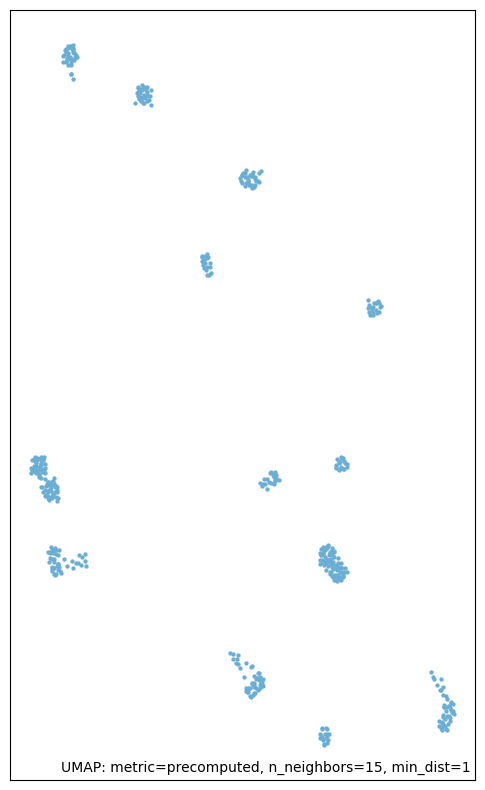

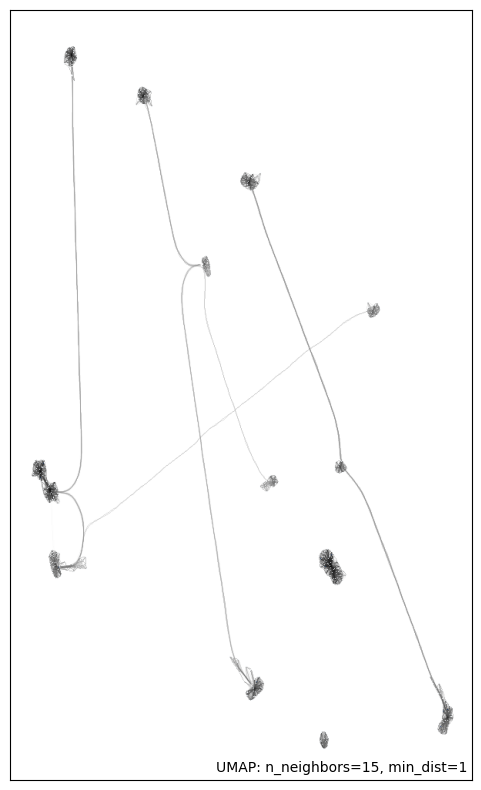

In [12]:
test_stability_r(5, 100, "")

/var/folders/p7/qsy7v2sd3_j1ypyqv03cpv7r0000gp/T/ipykernel_1901/3676708441.py:20: RuntimeWarning: invalid value encountered in sqrt
  mat_d = np.sqrt(1 - np.abs(mat_r))
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarn

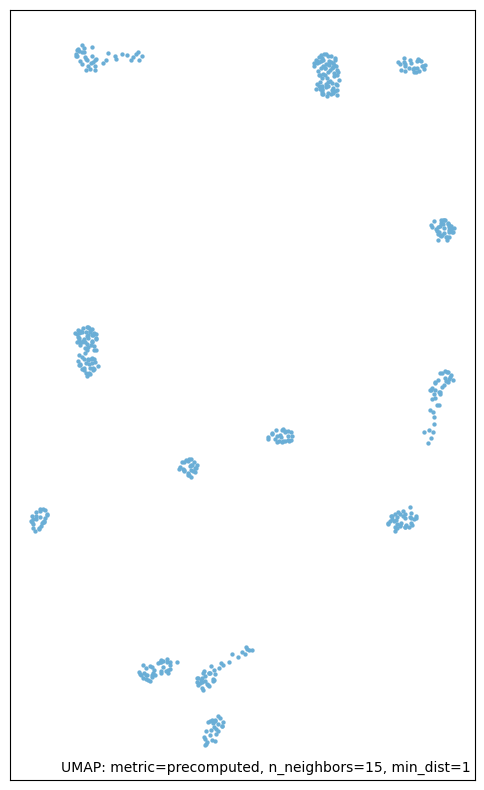

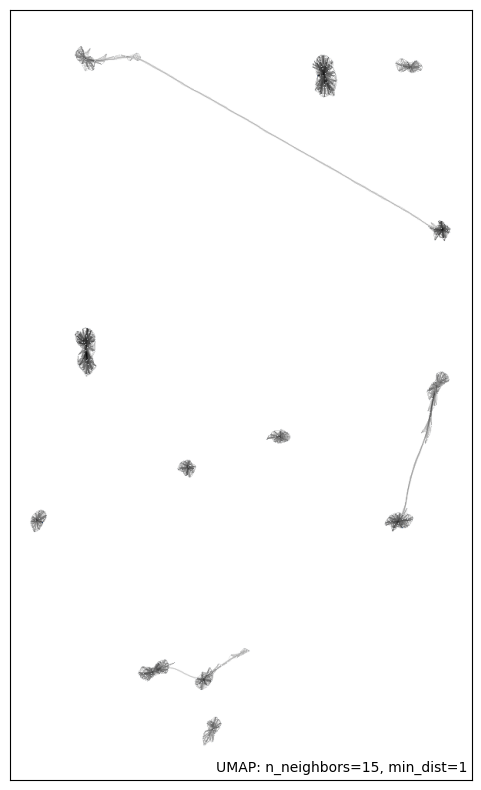

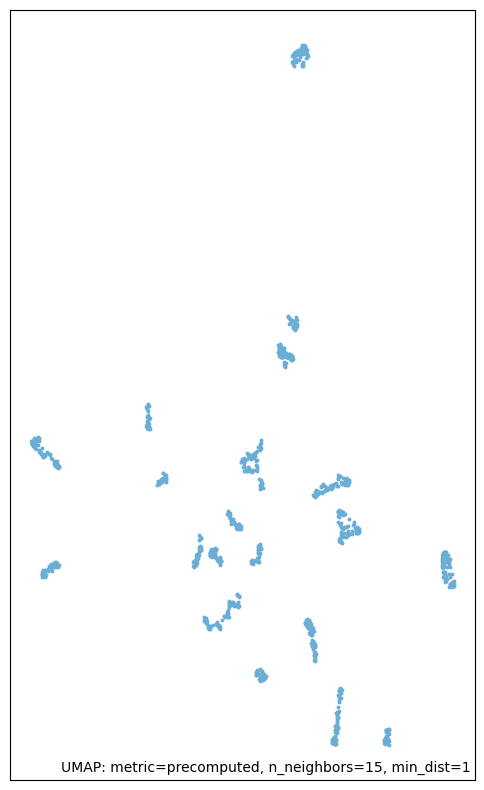

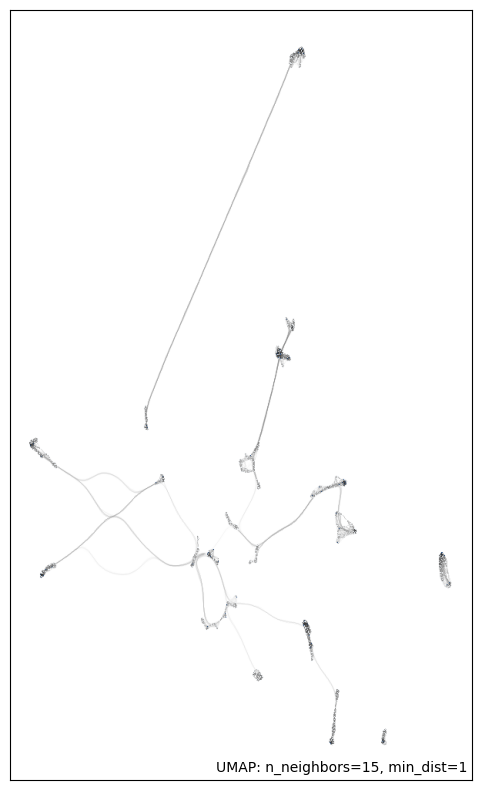

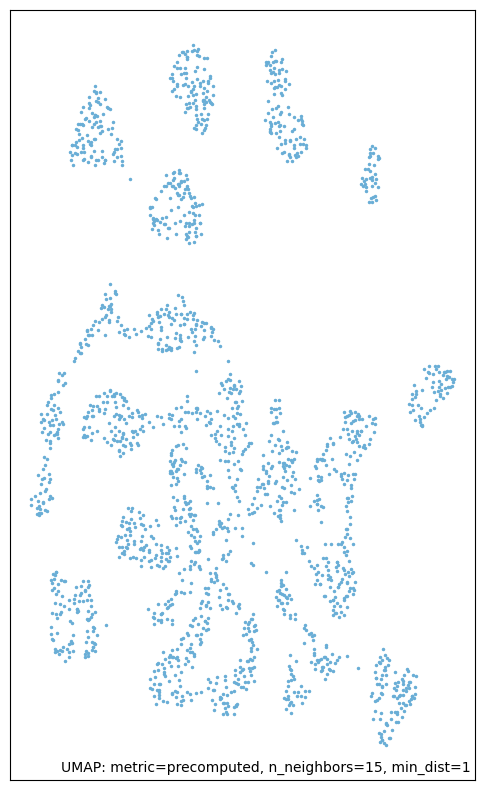

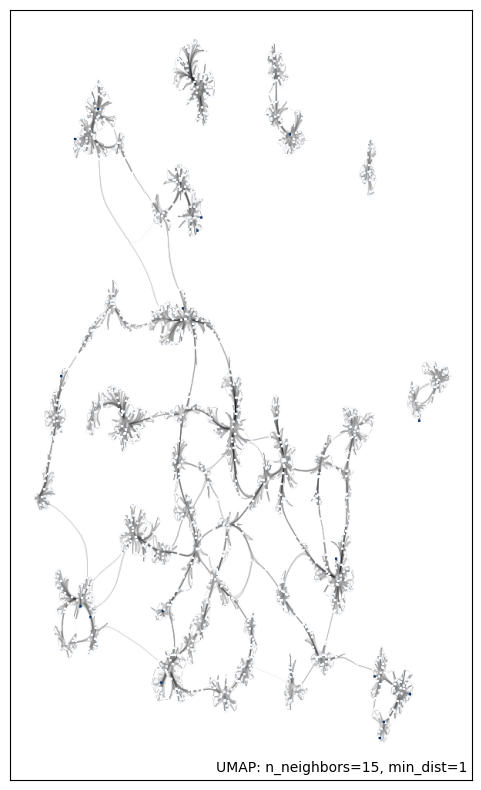

In [14]:
save_dir = "/Volumes/home/preclineu/lorkno/Documents/Autocorrelation/images/dim_reduction/"
n_comps = [5, 10, 20]
n_iter = 100

for n_comp in n_comps:
    test_stability_r(n_comp, n_iter, save_dir)

In [10]:
def test_stability(n_comp, n_iter, save_dir):
    icas = [FastICA(n_comp, whiten='unit-variance').fit(mat) for i in range(n_iter)]
    ss = [ica.transform(mat) for ica in icas]
    ss_mat = np.concatenate(ss, axis=1)

    # Whitened unmixing matrix
    mat_w = np.concatenate([ica.components_.T for ica in icas], axis=1).T

    # Normalized covariance matrix
    mat_c = np.cov(mat.T) # 34 x 34

    # Correlations between ICs (with some slight numerical inaccuracy)
    mat_r = np.linalg.multi_dot([mat_w, mat_c, mat_w.T])

    # ICASSO distance metric
    mat_d = np.sqrt(1 - np.abs(mat_r))
    mat_d[np.isnan(mat_d)] = 0 # If rho >= 1

    # iter_labels = np.repeat(np.arange(0, n_iter), ss[0].shape[1])
    comp_labels = np.tile(np.arange(0, ss[0].shape[1]), n_iter)

    # Euclidean distance
    mapper = umap.UMAP(n_neighbors=50, min_dist=1).fit(ss_mat.T)

    umap.plot.points(mapper, labels=comp_labels, width=1600, height=1600)
    plt.savefig(join(save_dir, "ica_umap_euclid_points_{}_comps.png".format(n_comp)))

    umap.plot.connectivity(mapper, show_points=True, edge_bundling="hammer", width=1600, height=1600)
    plt.savefig(join(save_dir, "ica_umap_euclid_connectivity_{}_comps.png".format(n_comp)))

    # Precomputed ICASSO distance
    mapper = umap.UMAP(n_neighbors=50, min_dist=1, metric="precomputed").fit(mat_d)

    umap.plot.points(mapper, labels=comp_labels, width=1600, height=1600)
    plt.savefig(join(save_dir, "ica_umap_precomp_points_{}_comps.png".format(n_comp)))

    umap.plot.connectivity(mapper, show_points=True, edge_bundling="hammer", width=1600, height=1600)
    plt.savefig(join(save_dir, "ica_umap_precomp_connectivity_{}_comps.png".format(n_comp)))
    

/var/folders/p7/qsy7v2sd3_j1ypyqv03cpv7r0000gp/T/ipykernel_2235/23554798.py:16: RuntimeWarning: invalid value encountered in sqrt
  mat_d = np.sqrt(1 - np.abs(mat_r))
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This

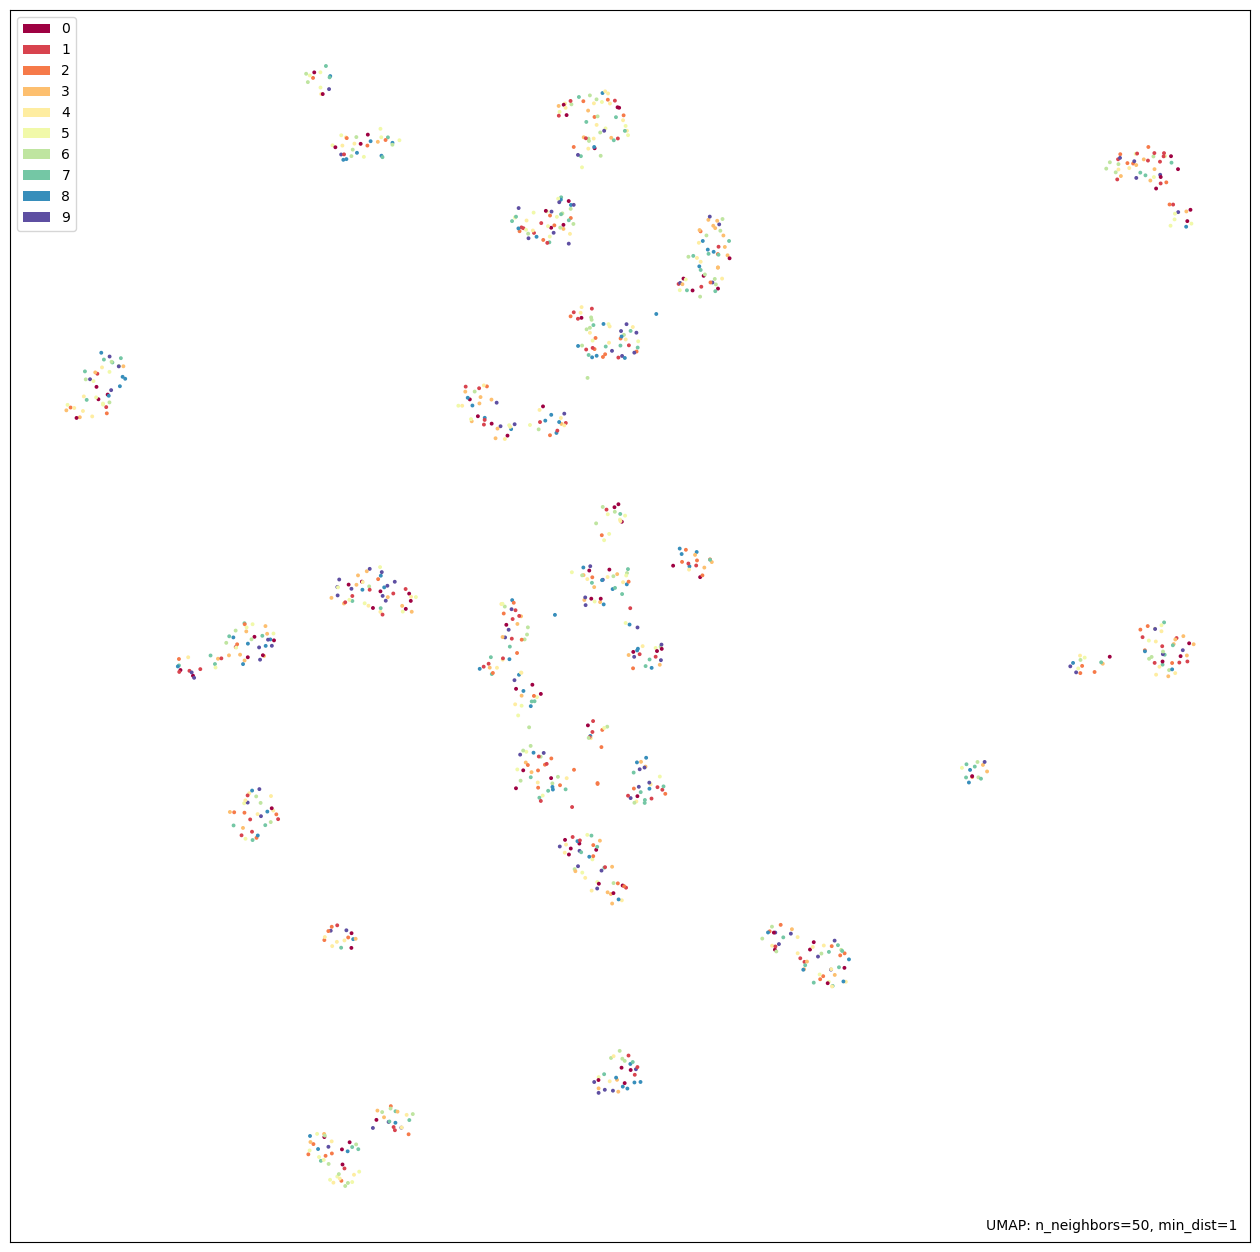

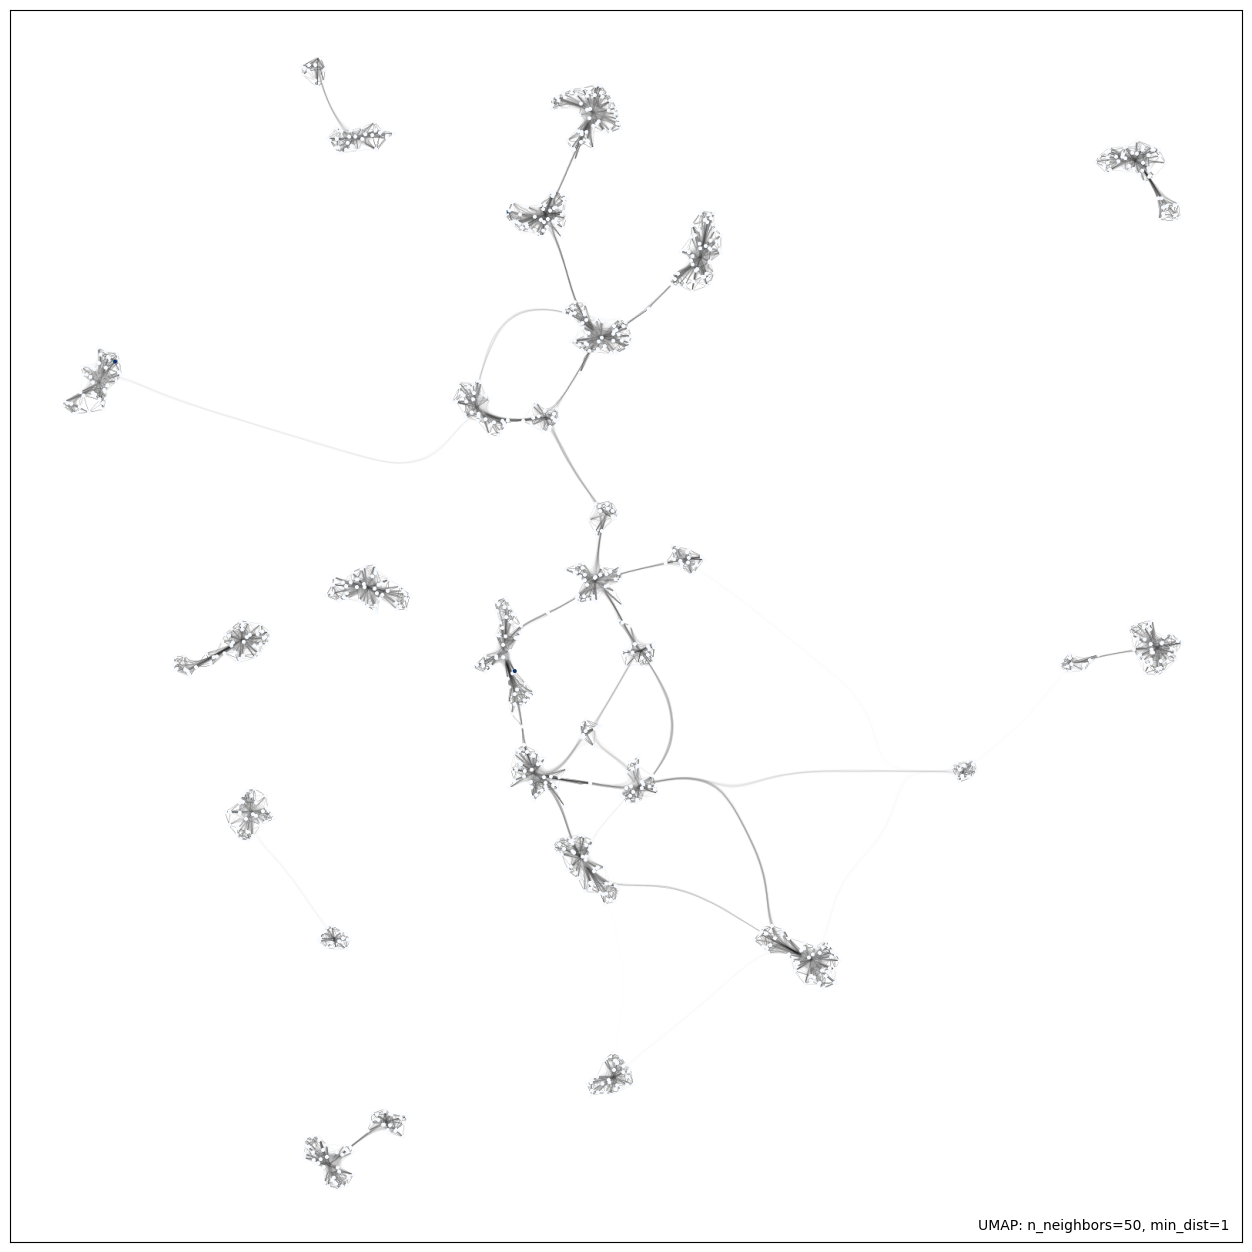

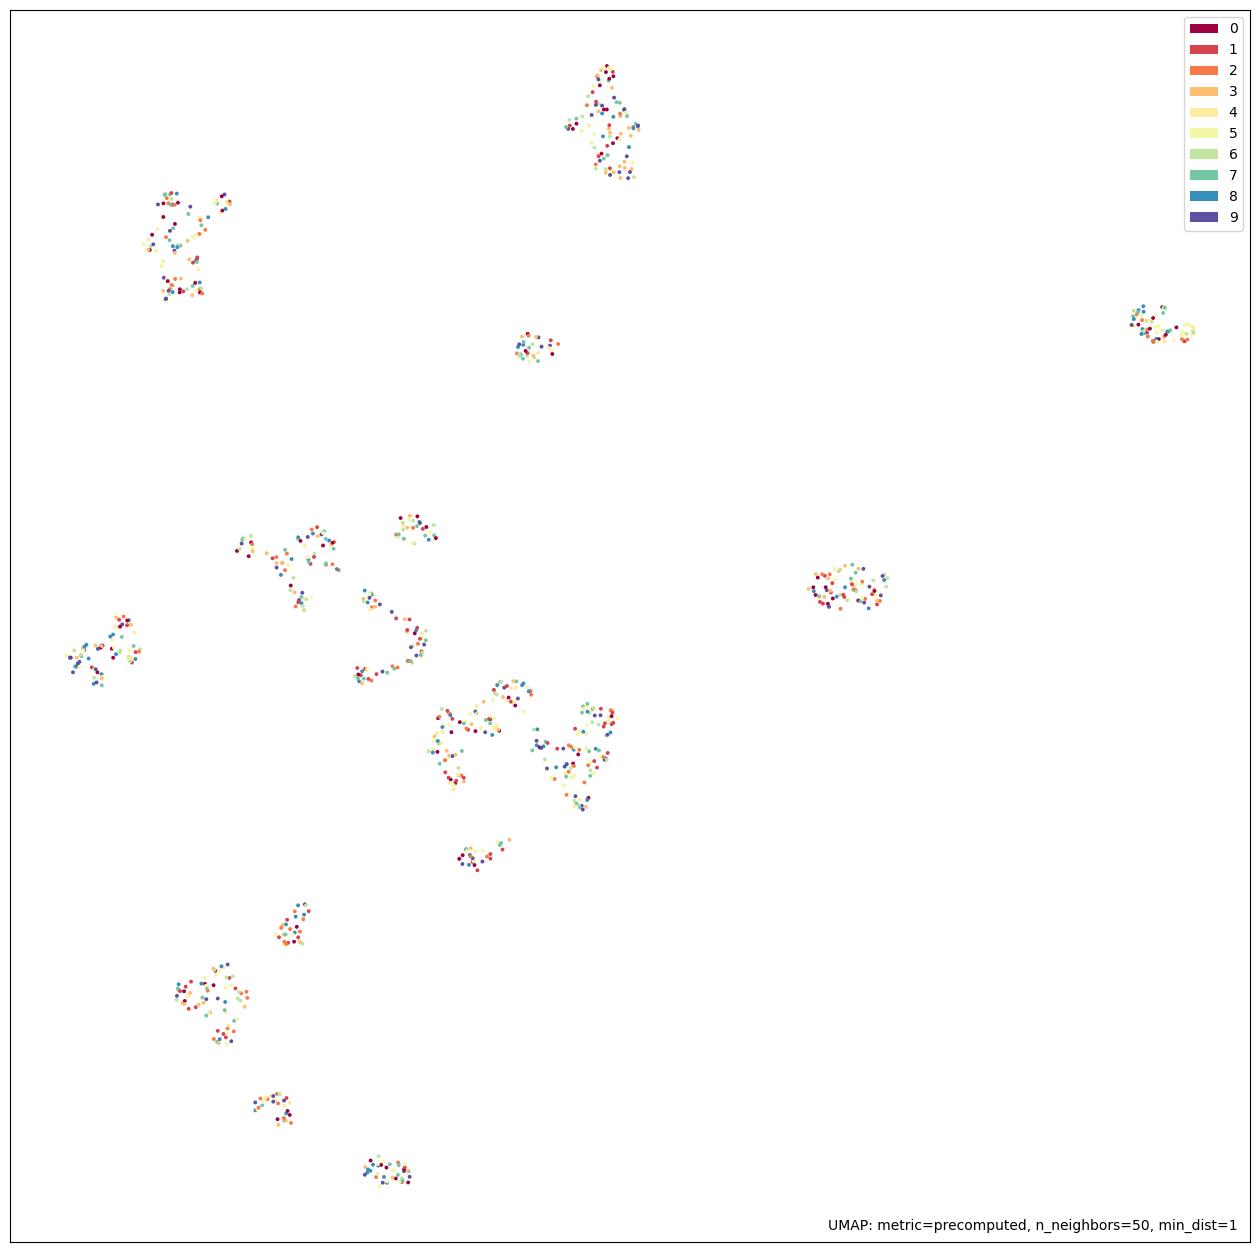

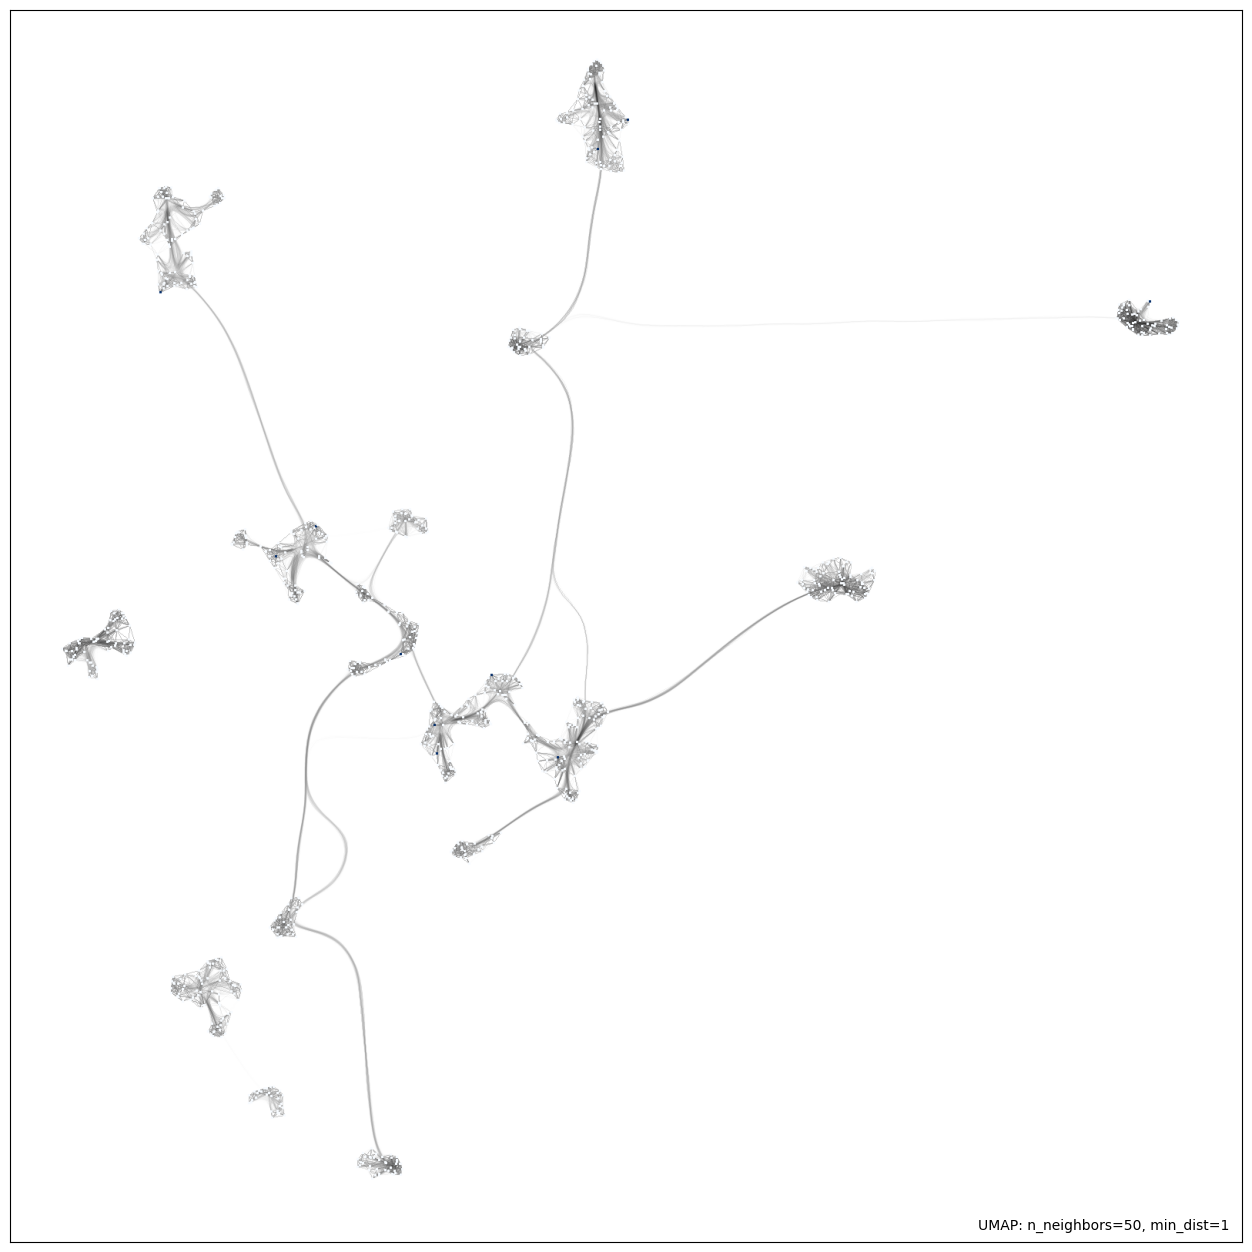

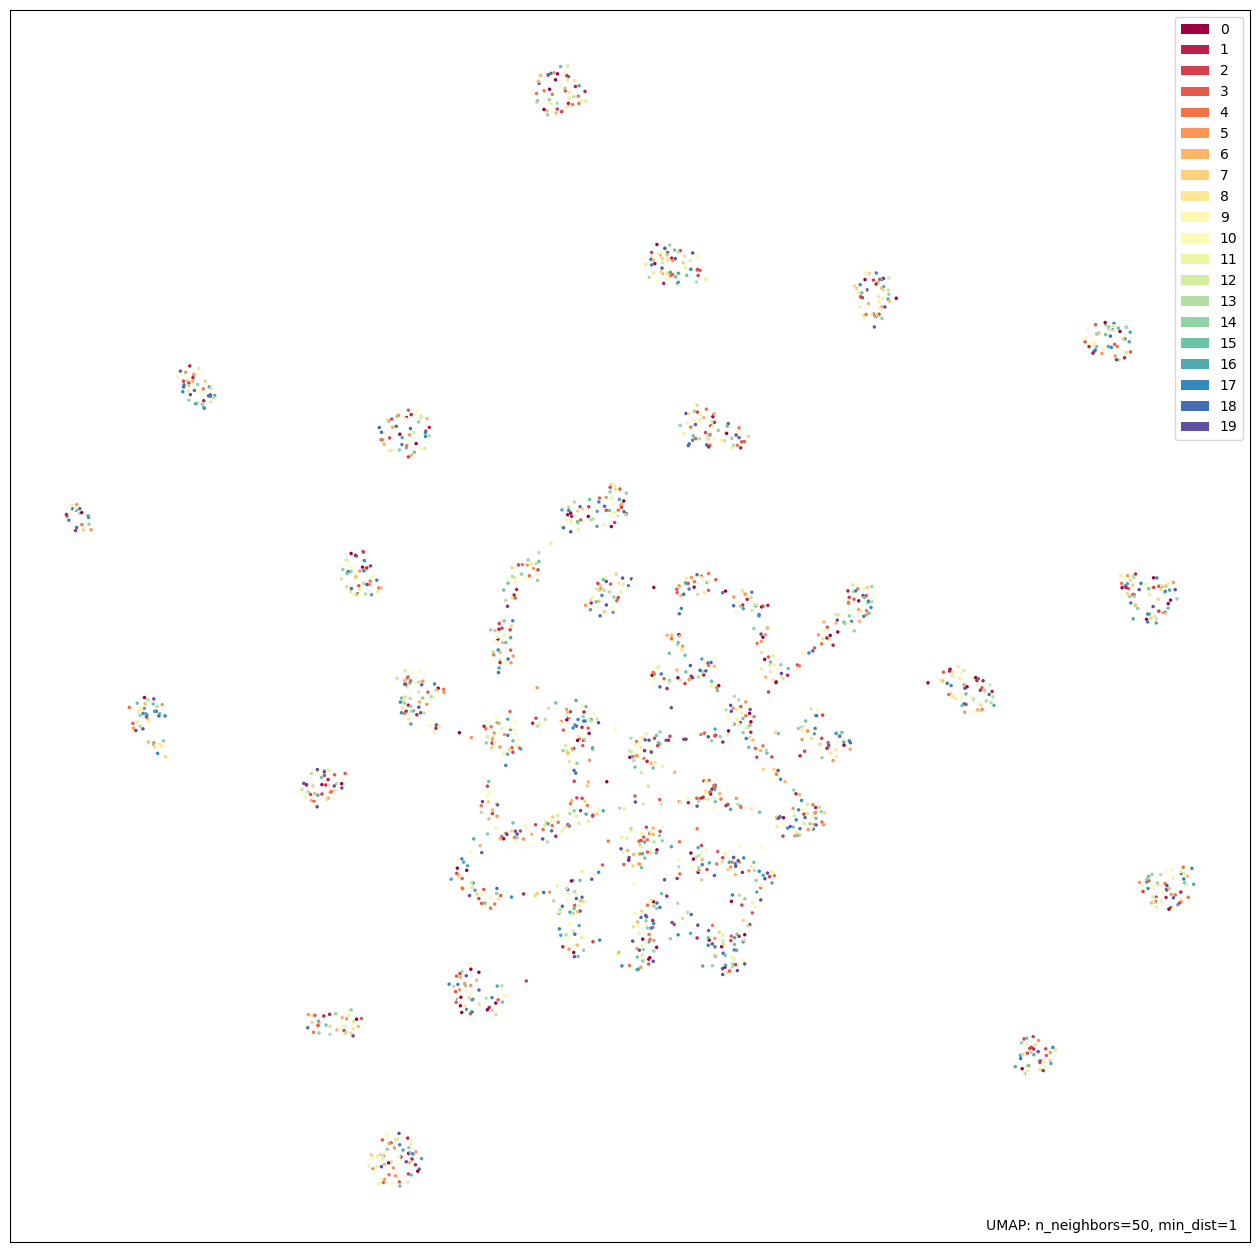

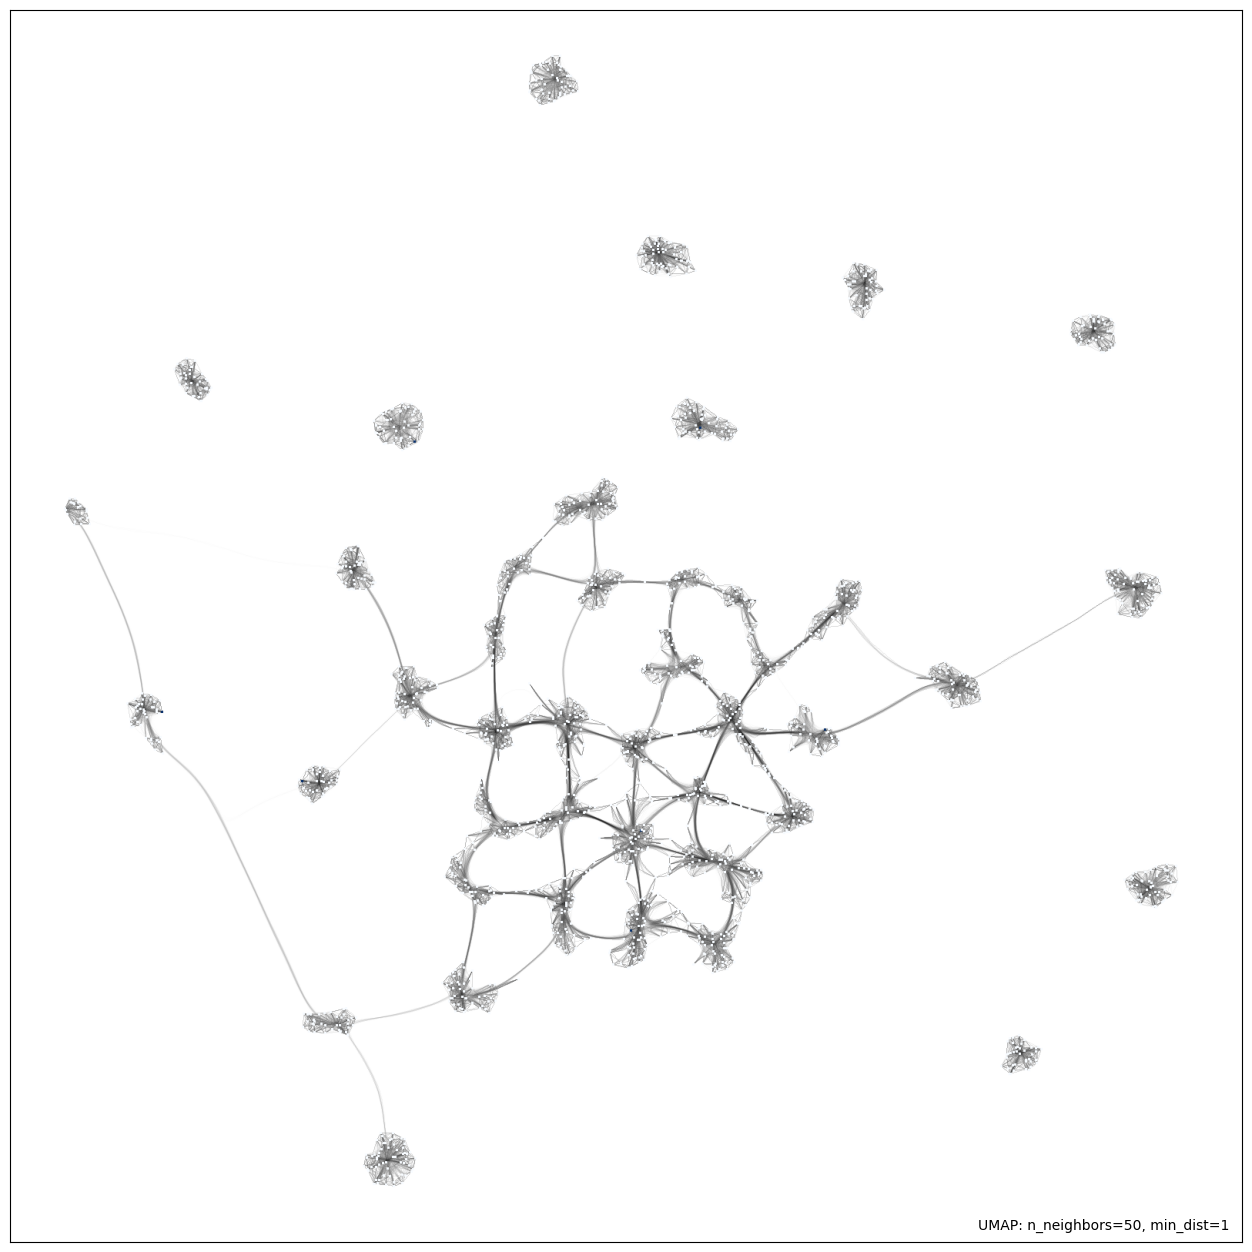

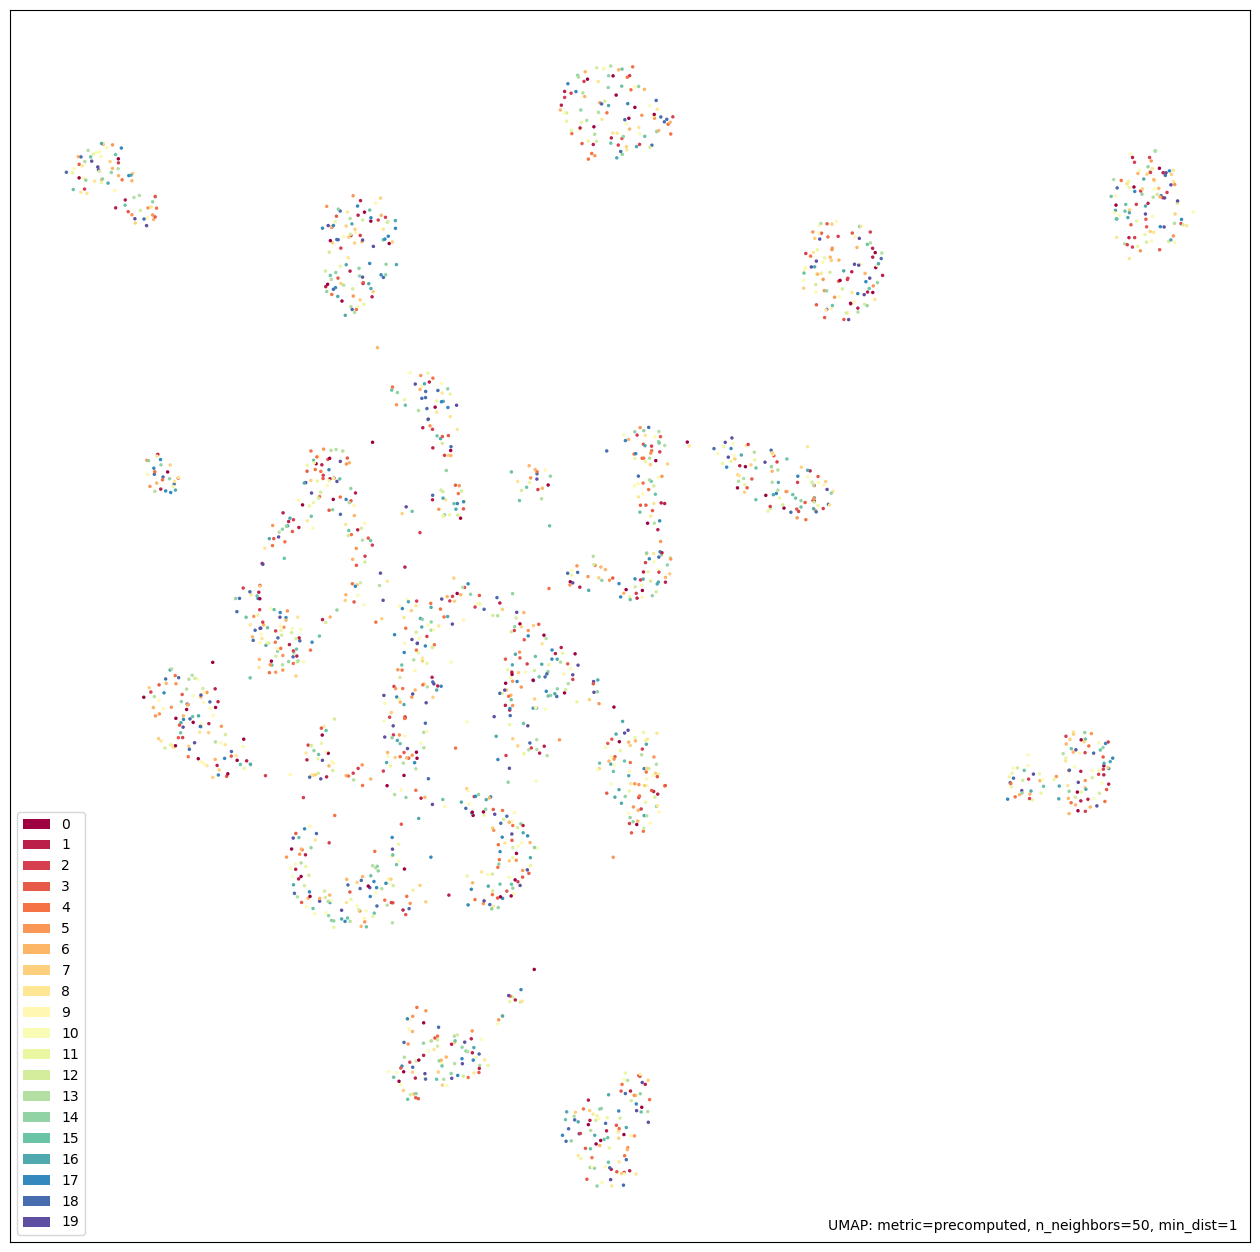

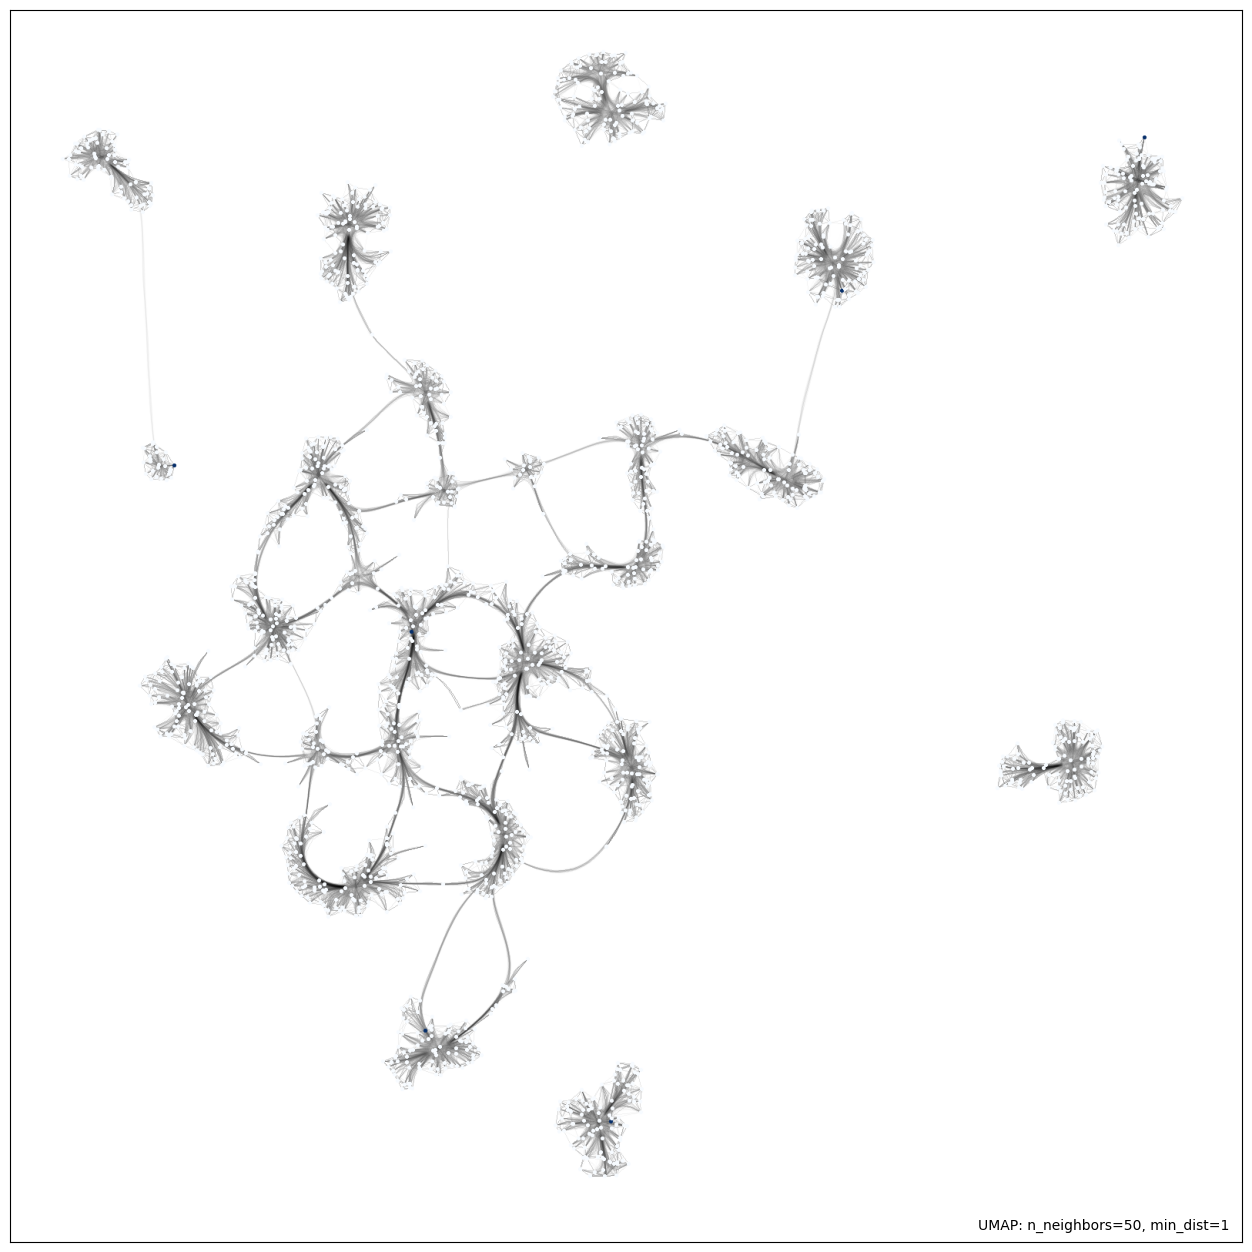

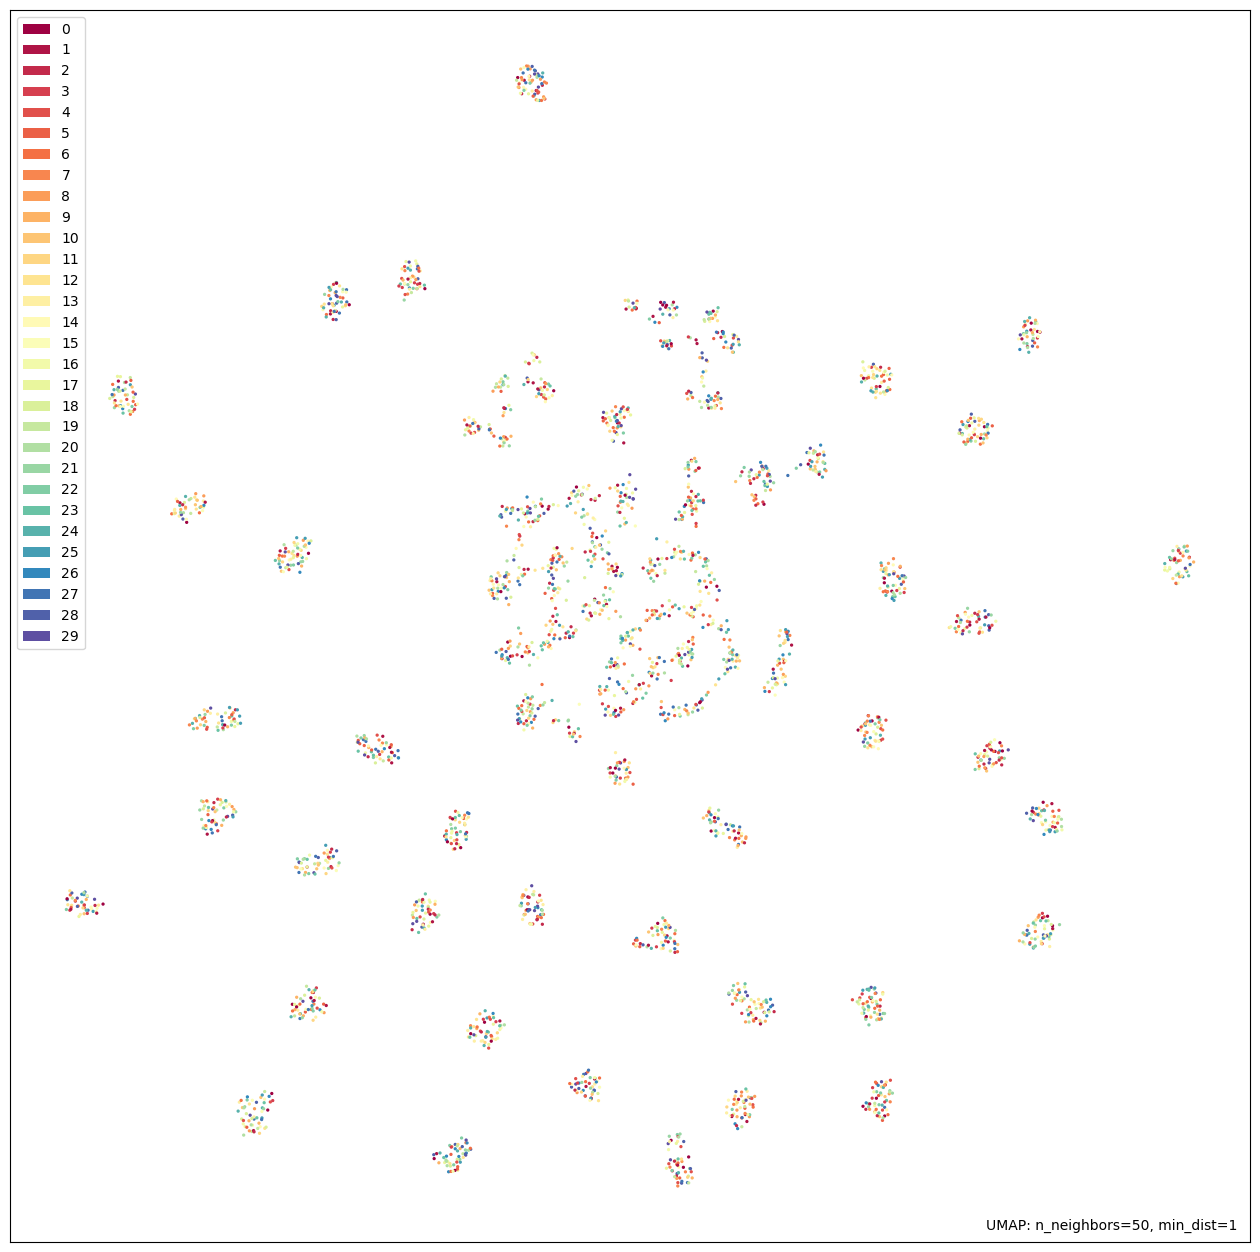

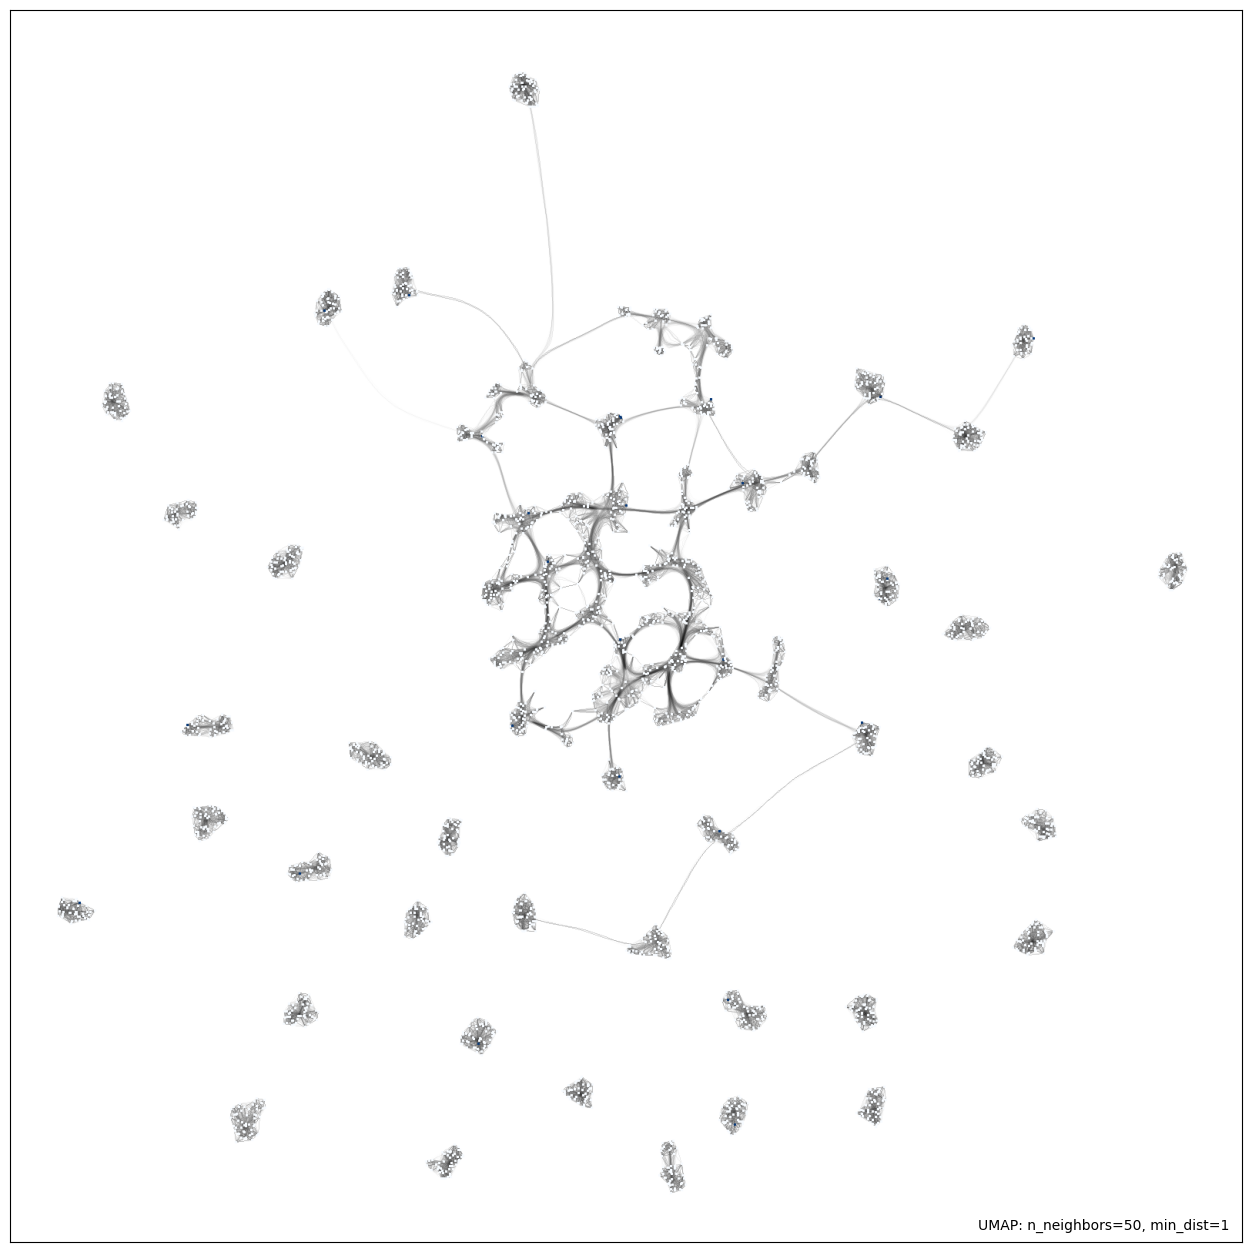

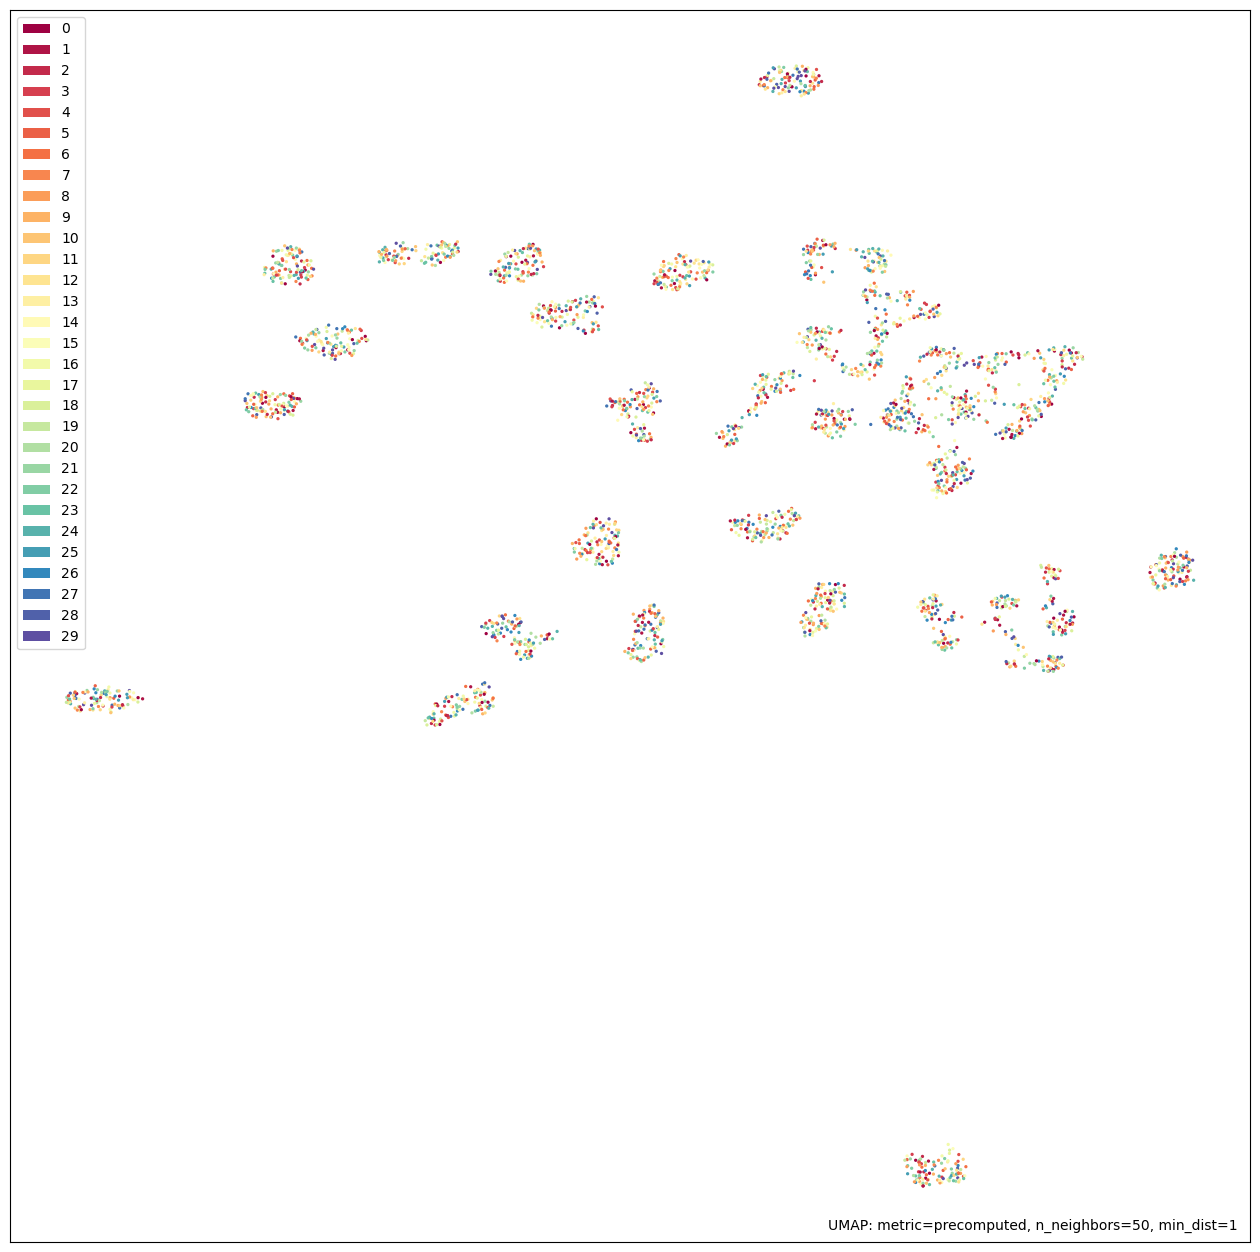

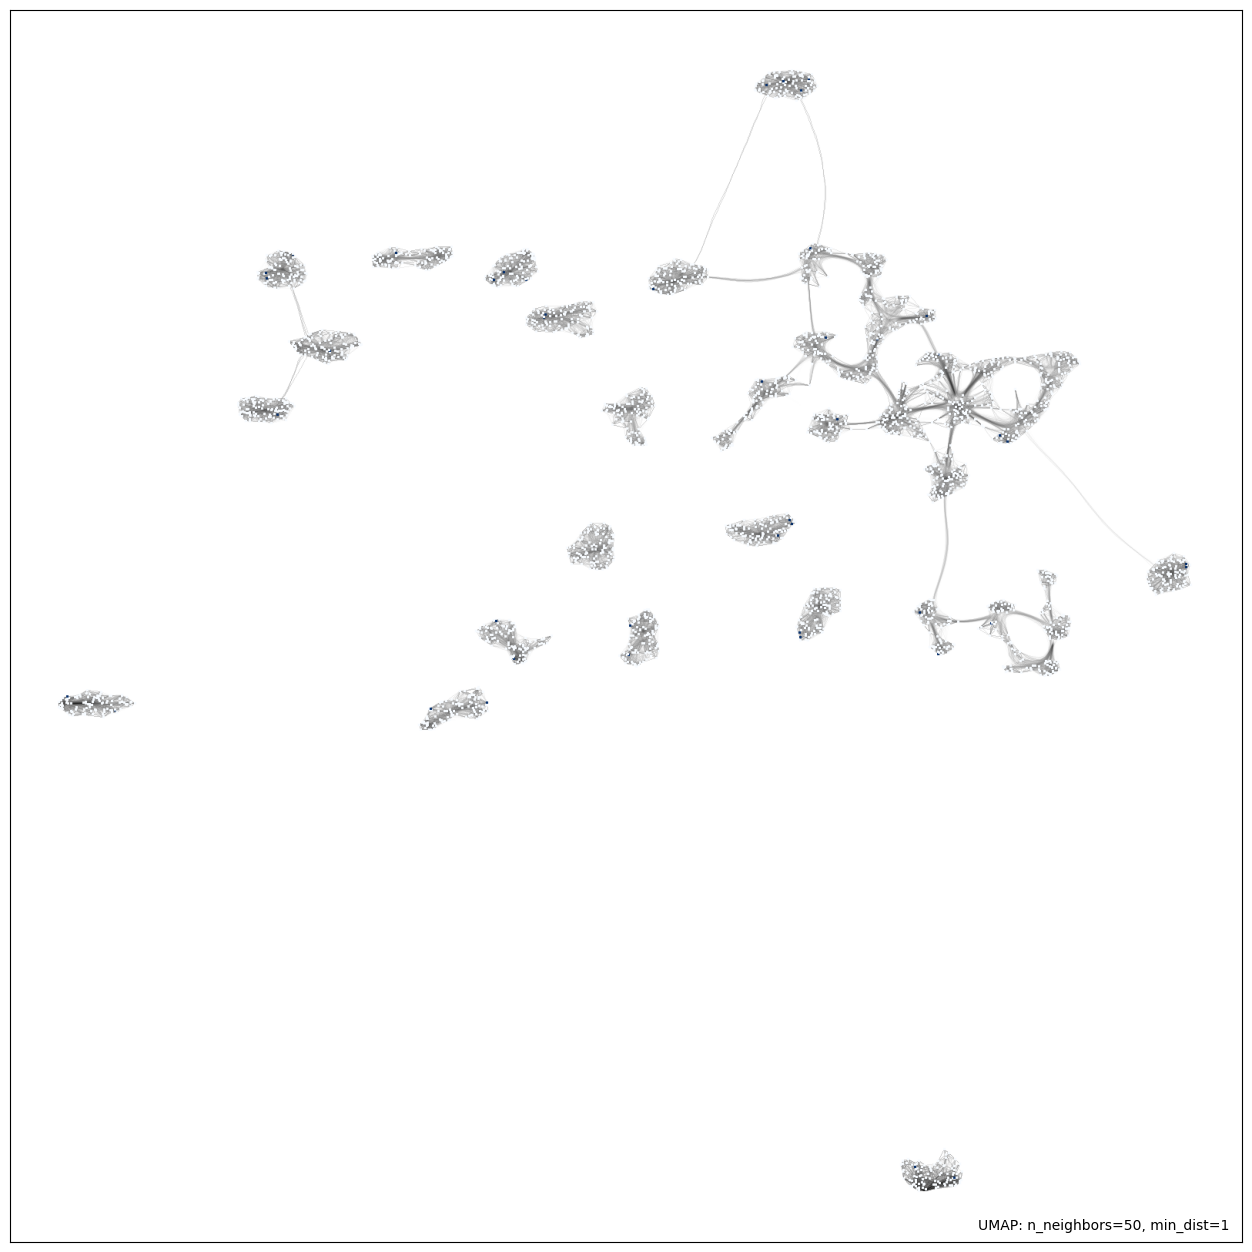

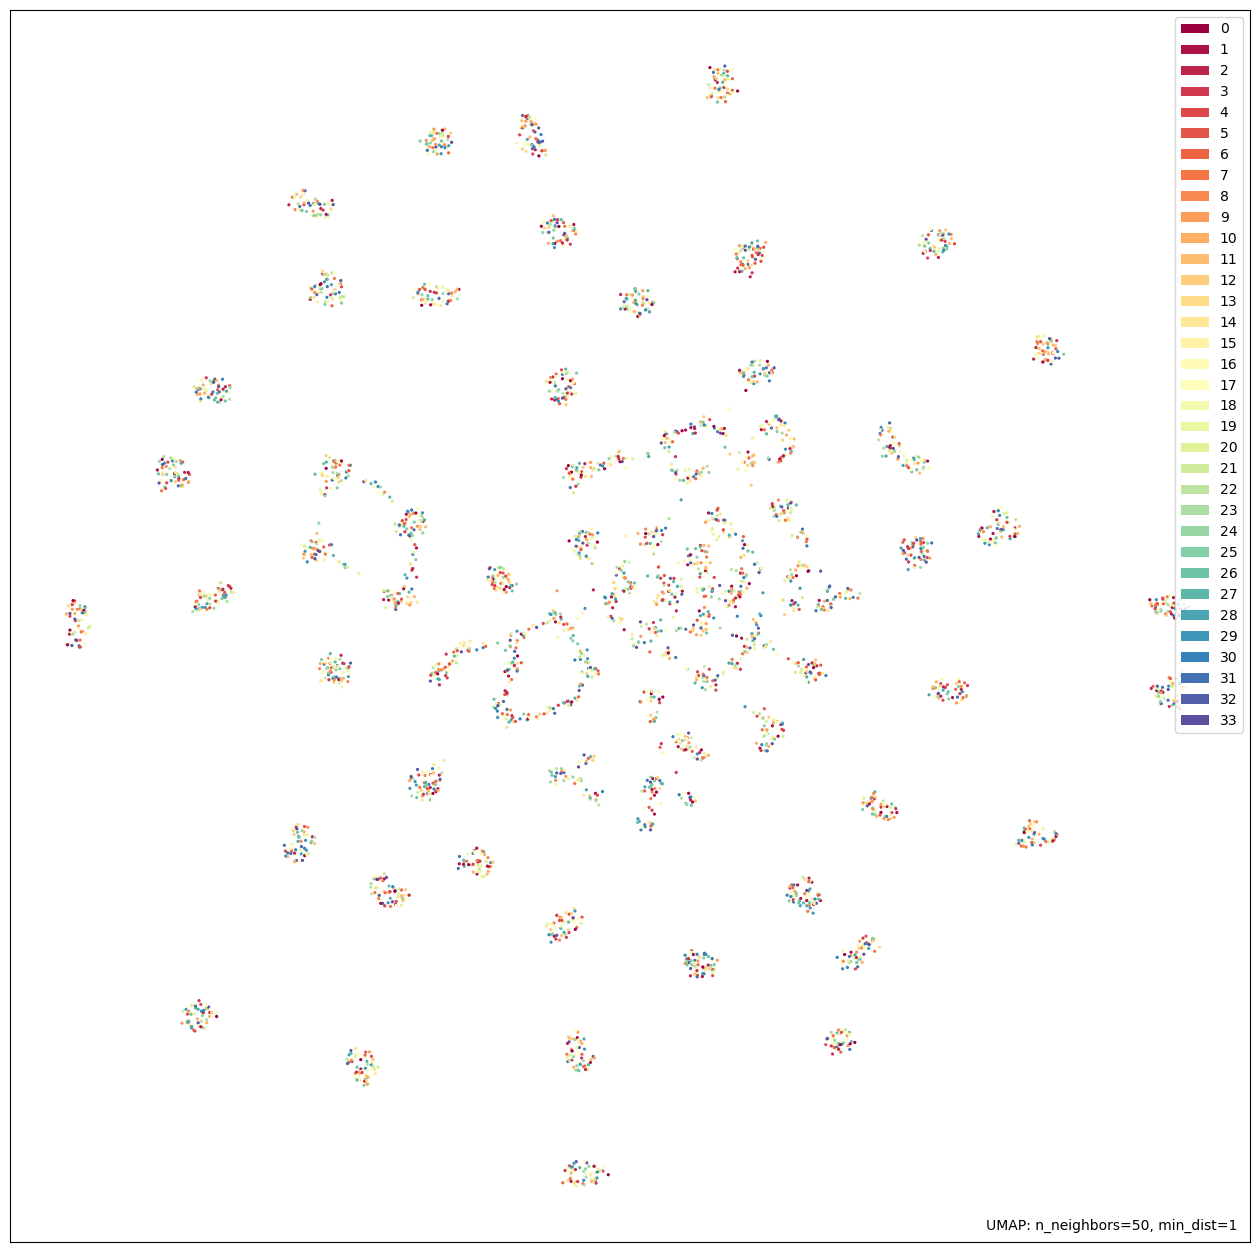

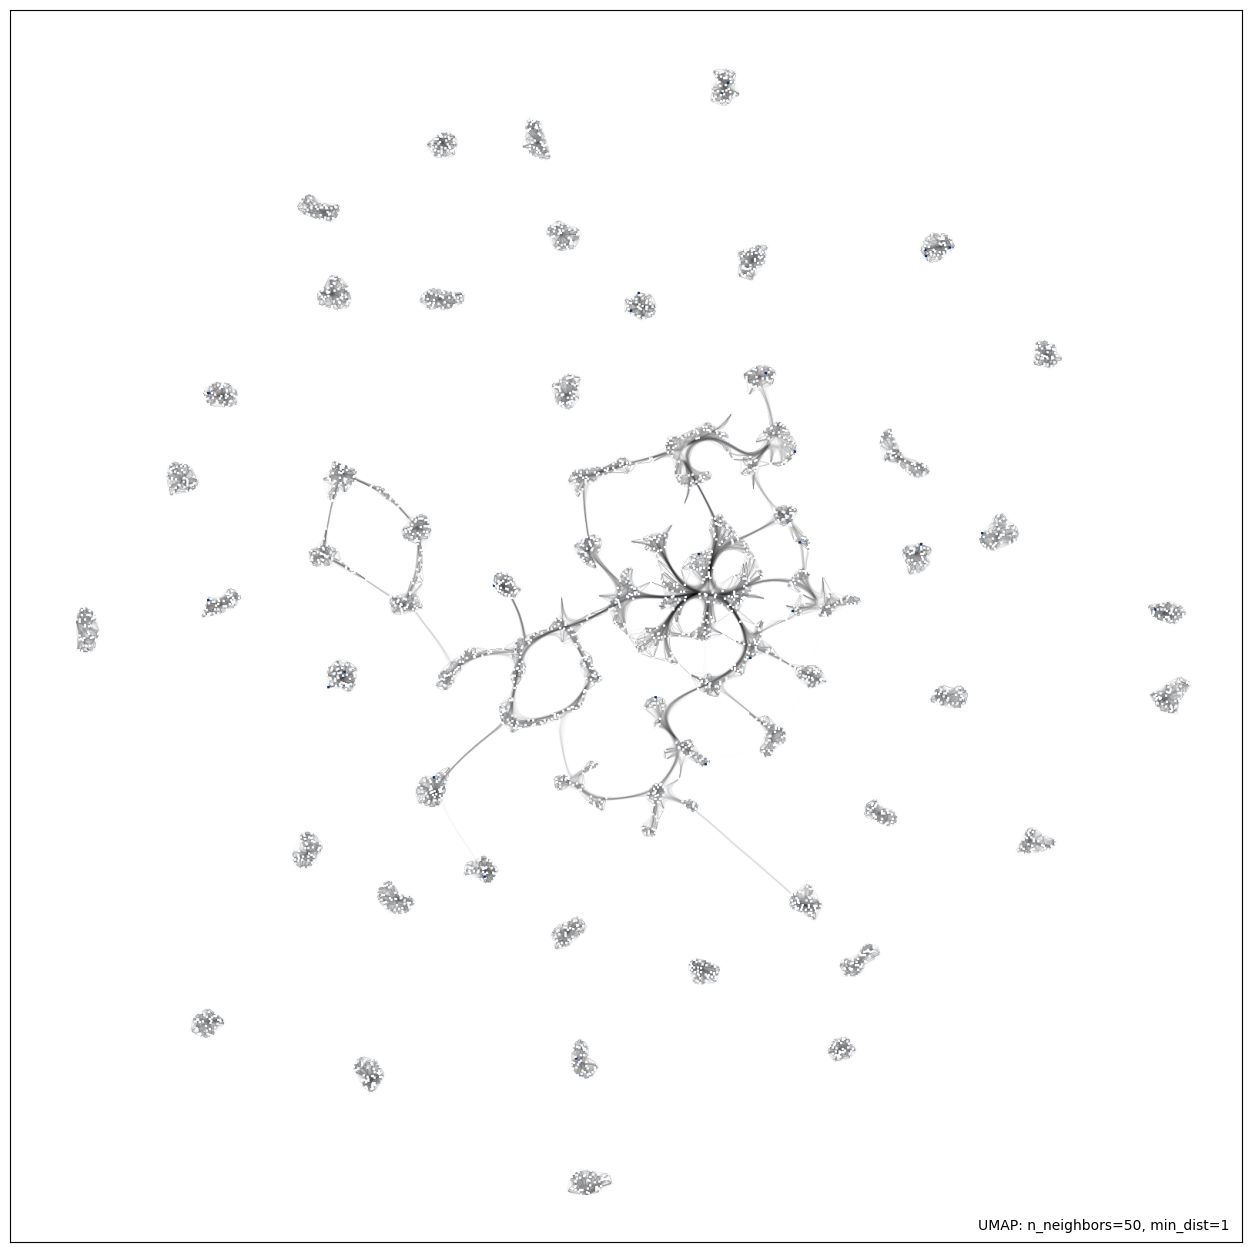

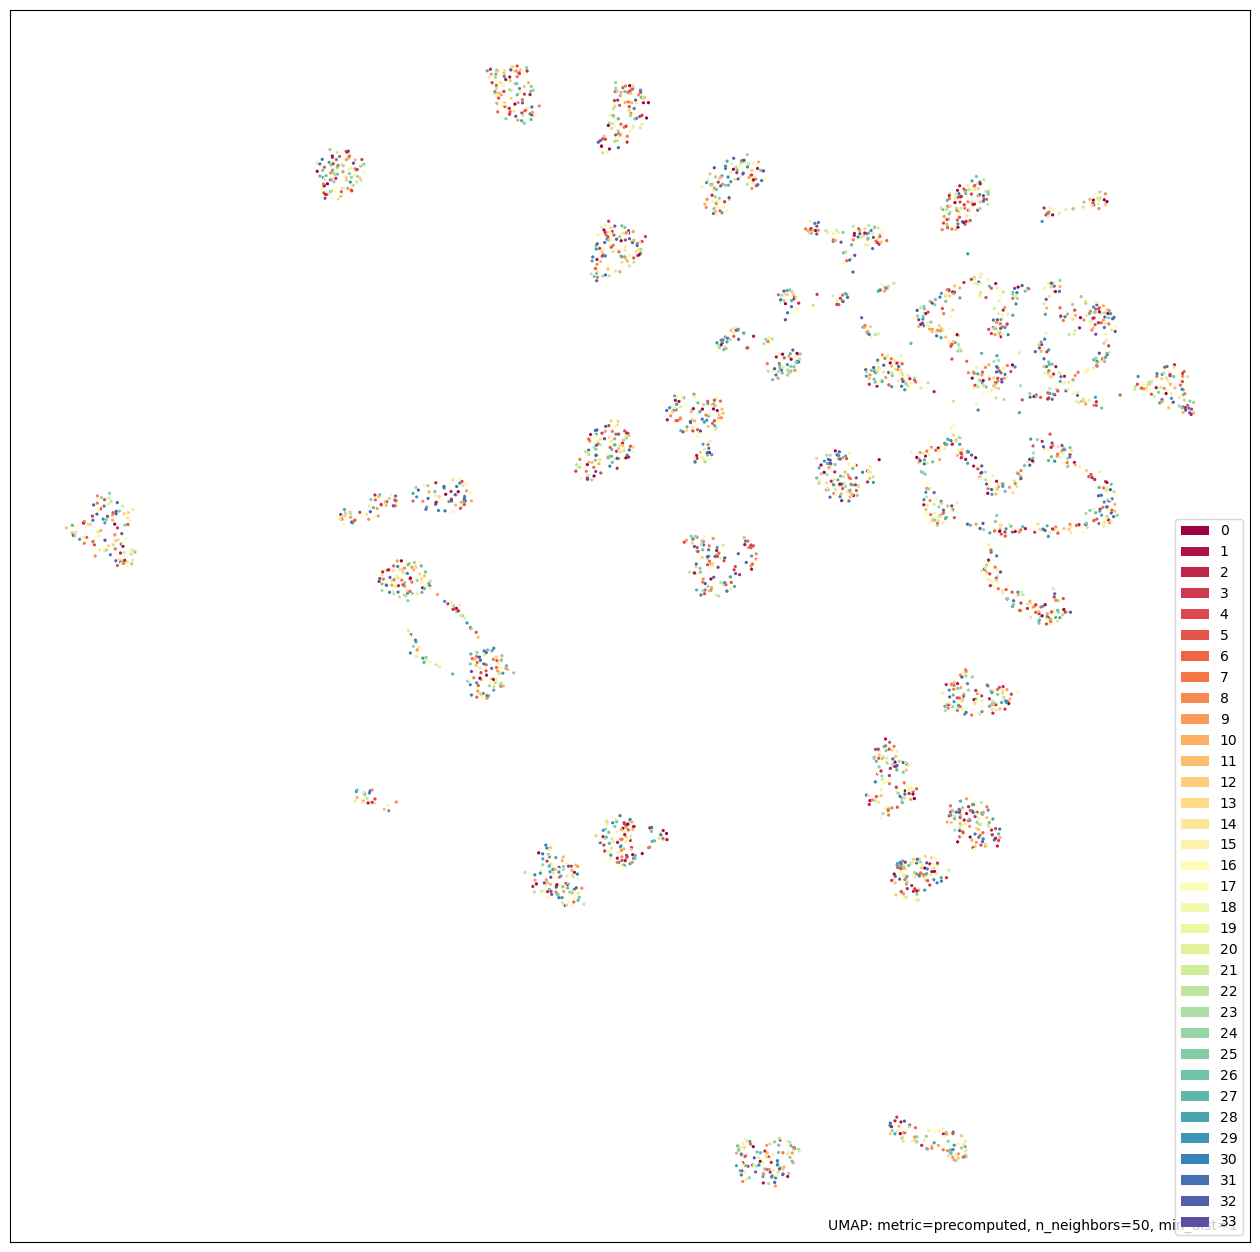

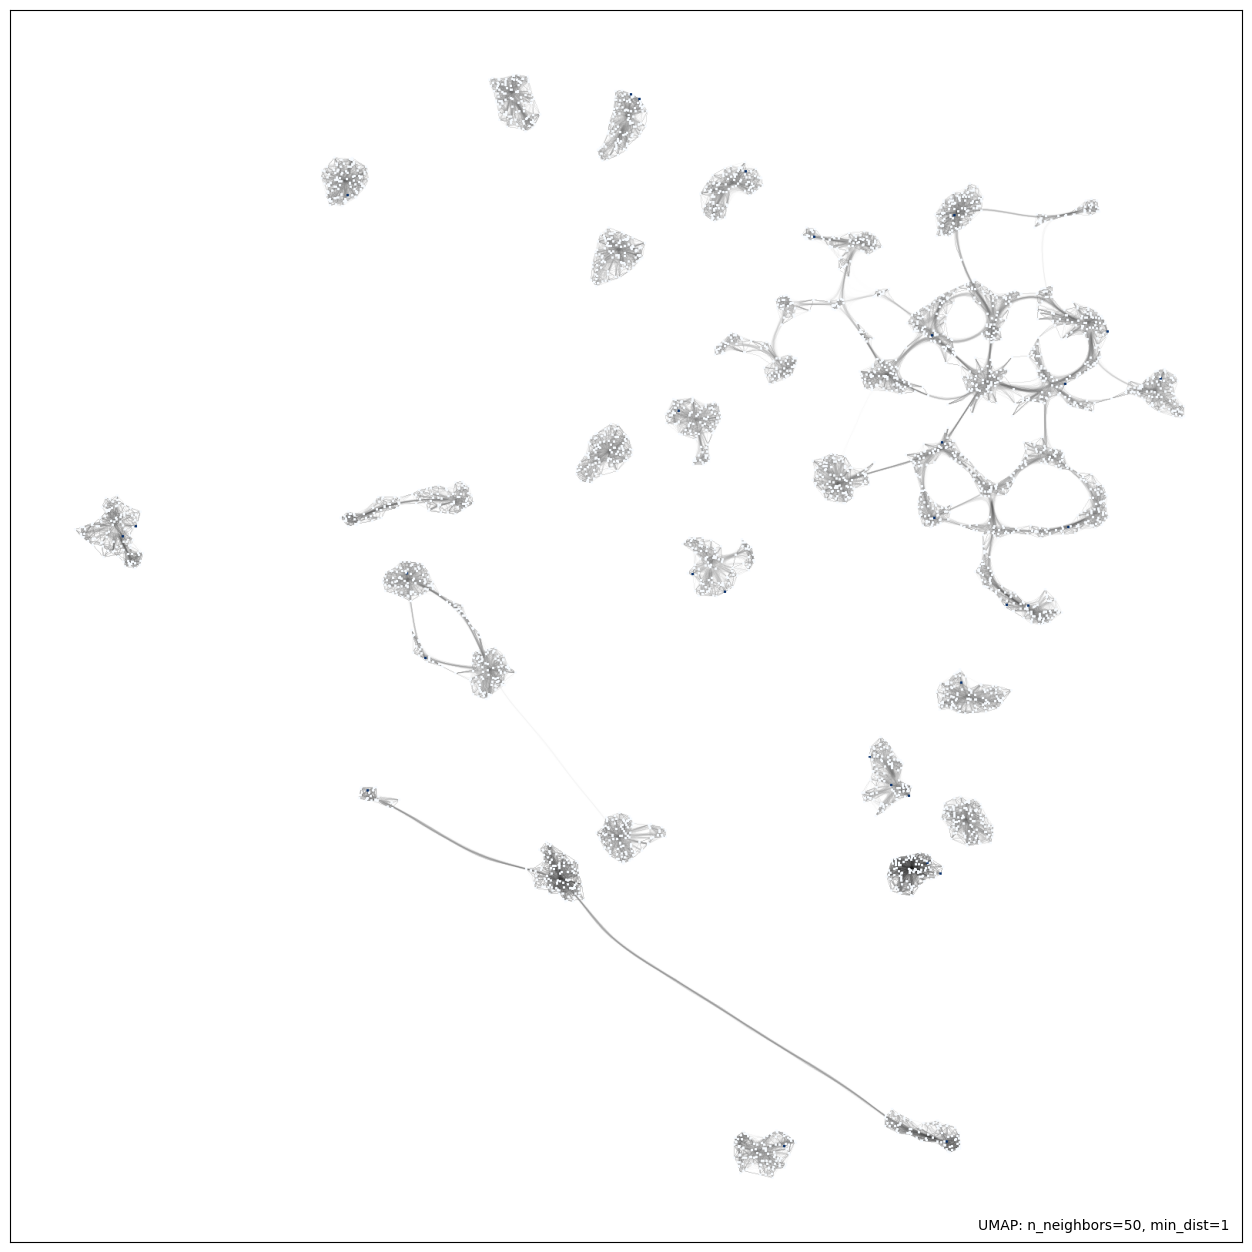

In [11]:
save_dir = "/Volumes/home/preclineu/lorkno/Documents/Autocorrelation/images/dim_reduction/"
n_comps = [10, 20, 30, mat.shape[1]]
n_iter = 100

for n_comp in n_comps:
    test_stability(n_comp, n_iter, save_dir)

In [8]:
# Rerun fastICA many times
n_iter = 100
icas = [FastICA(whiten='unit-variance').fit(mat) for i in range(n_iter)]
ss = [ica.transform(mat) for ica in icas]

In [10]:
mat_w = np.concatenate([ica.components_.T for ica in icas], axis=1).T

In [11]:
# Normalized covariance matrix
mat_c = np.cov(mat.T) # 34 x 34

# Unnormalized covariance matrix
# mat_centered = mat - np.mean(mat, axis=0)
# mat_c = np.dot(mat_centered.T, mat_centered)

(eig_d, eig_e) = np.linalg.eigh(mat_c)
sort_indices = np.argsort(eig_d)[::-1]
eig_d, eig_e = eig_d[sort_indices], eig_e[:, sort_indices]
eig_e *= np.sign(eig_e[0])

mat_k = (eig_e / np.sqrt(eig_d)).T

In [111]:
# The scikit implementation of fastICA works with unnormalised covariance matrices,
# that's why it does not correspond to our own whitening matrix.
np.allclose(icas[0].whitening_, mat_k)

False

In [12]:
mat_k_inv = np.dot(eig_e, np.diag(np.sqrt(eig_d))) # De-whitening matrix

mat_b = np.dot(mat_w, mat_k_inv)
mat_b /= np.sqrt(np.sum(np.square(mat_b), axis=1, keepdims=True))
# Roughly equivalent to np.linalg.multi_dot([mat_w, mat_c, mat_w.T]),
# which is how the ICASSO paper calculates it
# mat_r = np.dot(mat_b, mat_b.T)

mat_r = np.linalg.multi_dot([mat_w, mat_c, mat_w.T])

In [13]:
mat_d = np.sqrt(1 - np.abs(mat_r))
mat_d[np.isnan(mat_d)] = 0
# mat_d[mat_d < 0] = 0 # Some entries might be sub-zero due to floating point errors

/var/folders/p7/qsy7v2sd3_j1ypyqv03cpv7r0000gp/T/ipykernel_11021/36160084.py:1: RuntimeWarning: invalid value encountered in sqrt
  mat_d = np.sqrt(1 - np.abs(mat_r))


In [14]:
np.sum(mat_r >= 0.98)

108146

In [30]:
@numba.njit()
def icassoDist(a, b):
    d = np.sqrt(1 - np.corrcoef(a, b)[0, 1])

    if np.isnan(d):
        d = 0
        
    return d

In [31]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
logging.debug("test")

In [83]:
embedded = MDS(metric=True).fit_transform(s.T)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

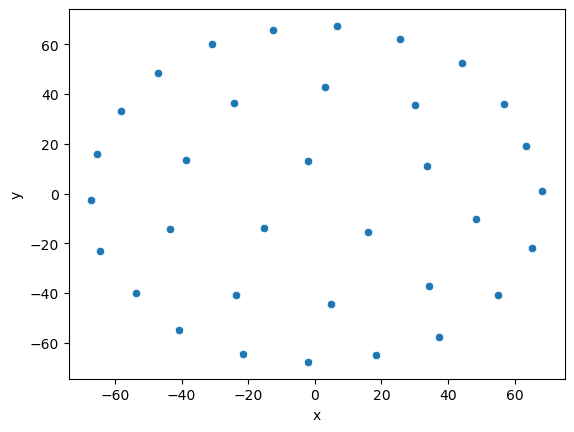

In [87]:
d = pd.DataFrame(embedded, columns=['x', 'y'])
sns.scatterplot(d, x='x', y='y')

In [85]:
mds = MDS()
embeddings = [mds.fit_transform(s.T) for s in ss]

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default

<Axes: xlabel='x', ylabel='y'>

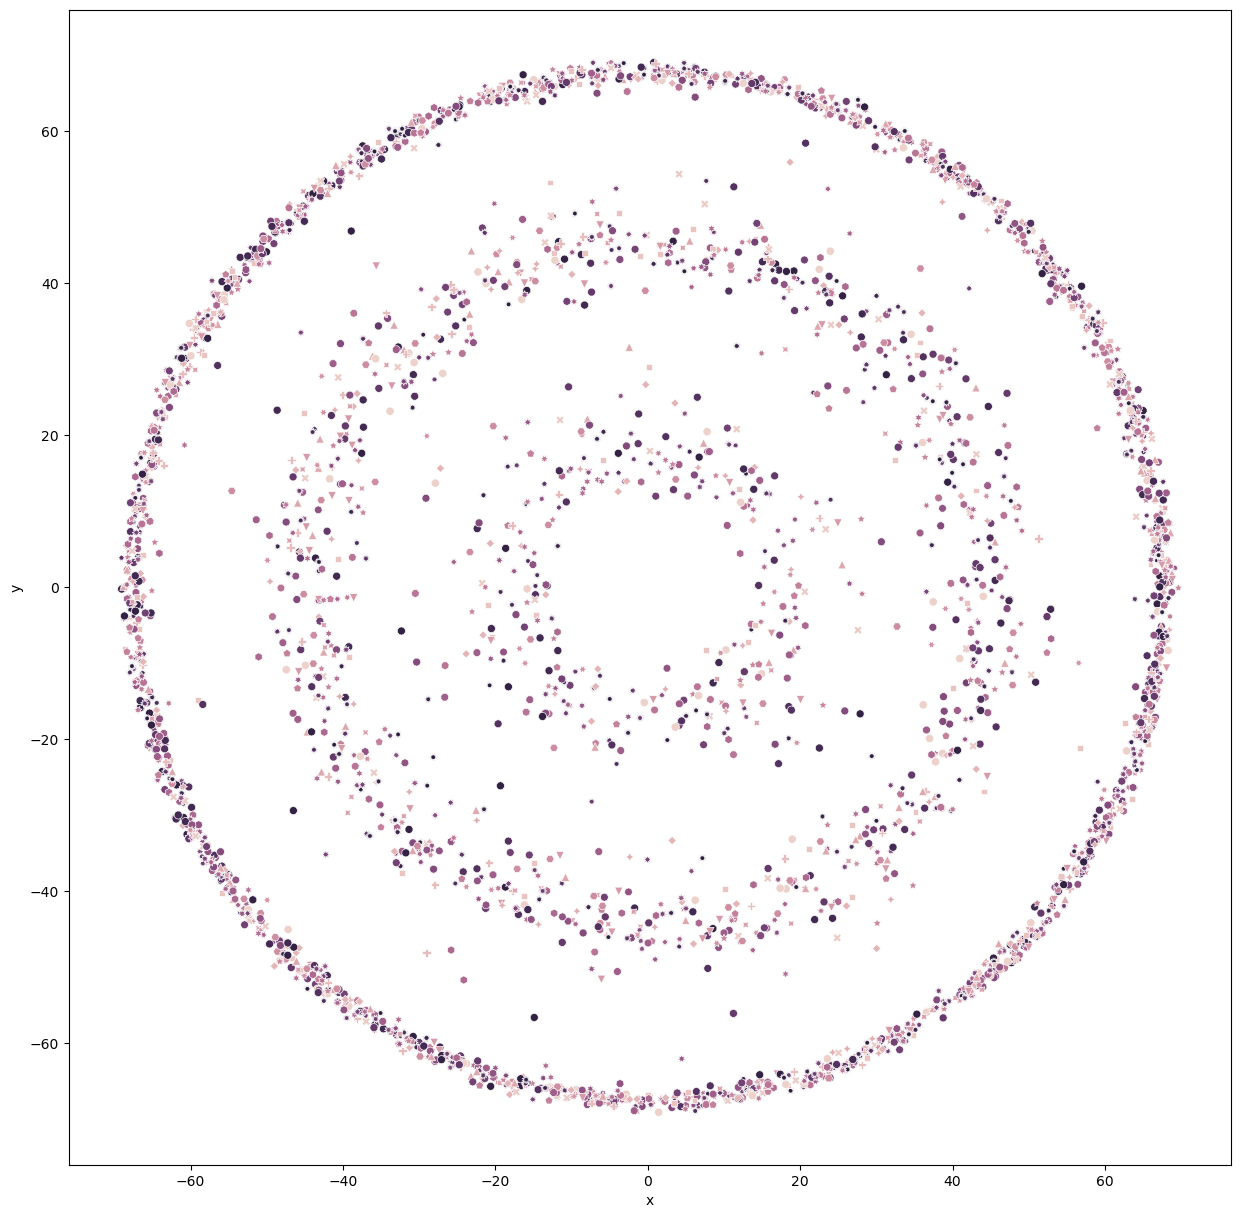

In [86]:
plt.figure(figsize=(15, 15))
d = pd.DataFrame(np.stack(embeddings, axis=0).reshape(-1, 2), columns=['x', 'y'])
d['comp'] = np.tile(np.arange(0, ss[0].shape[1]), 100)
sns.scatterplot(d, x='x', y='y', hue='comp', style='comp', legend=False)

In [17]:
ss_mat = np.concatenate(ss, axis=1)
ss_mat.shape

(4215, 3400)

In [18]:
iter_labels = np.repeat(np.arange(0, n_iter), ss[0].shape[1])
comp_labels = np.tile(np.arange(0, ss[0].shape[1]), n_iter)

In [84]:
mapper = umap.UMAP(n_neighbors=50, min_dist=1).fit(ss_mat.T)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<Axes: >

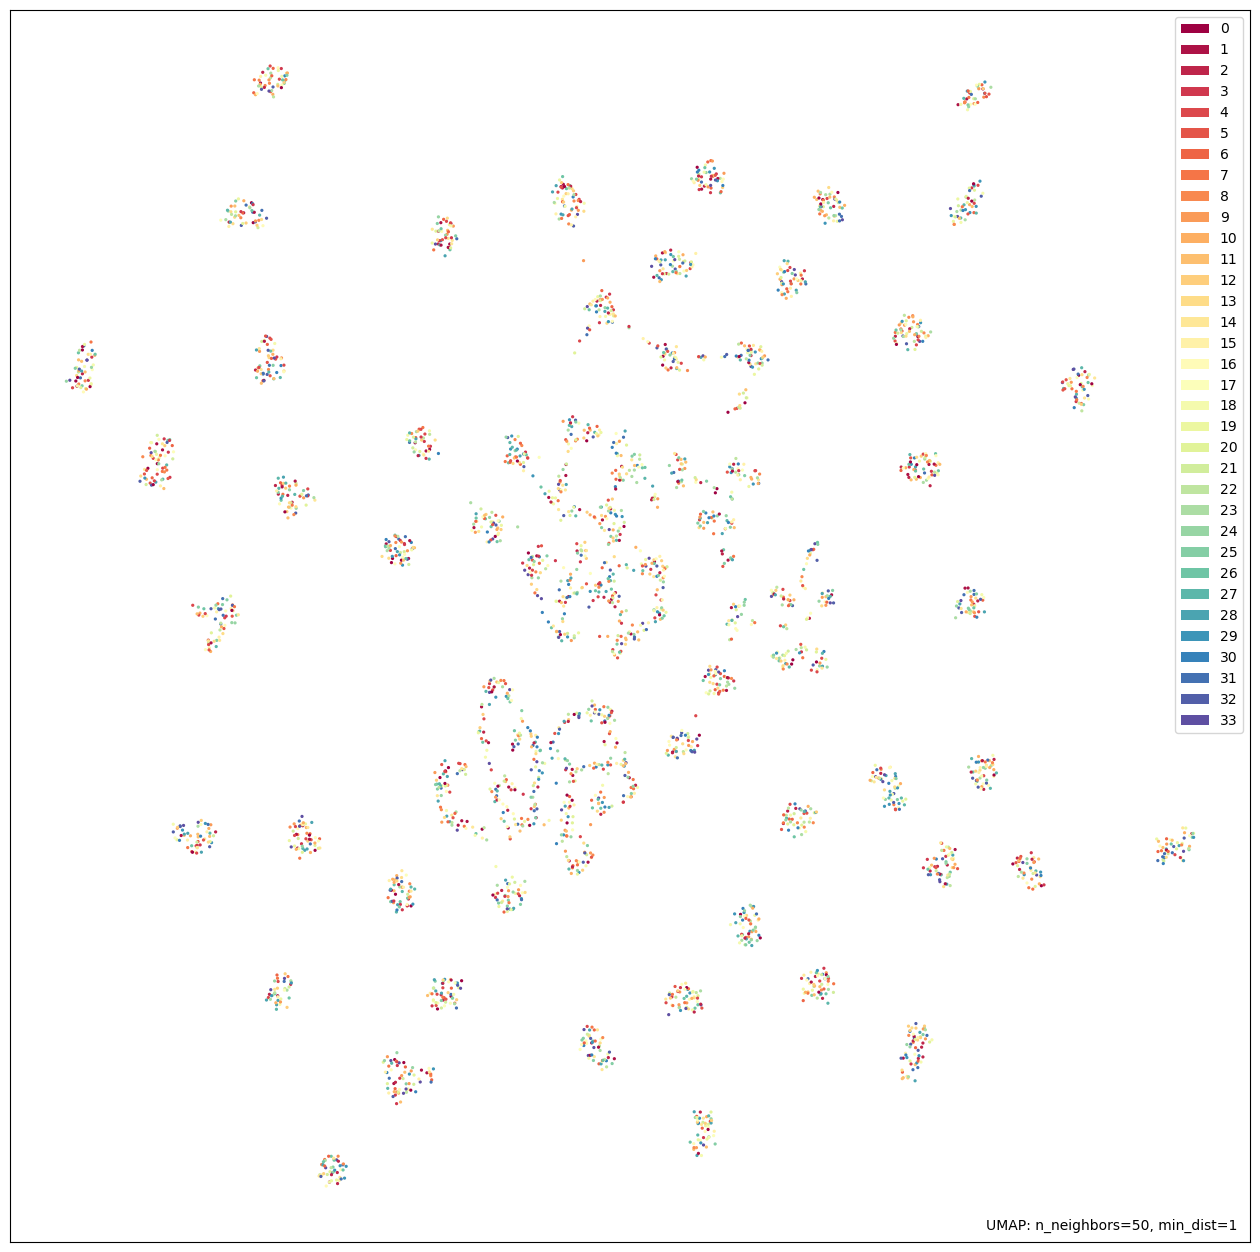

In [87]:
umap.plot.points(mapper, labels=comp_labels, width=1600, height=1600)

<Axes: >

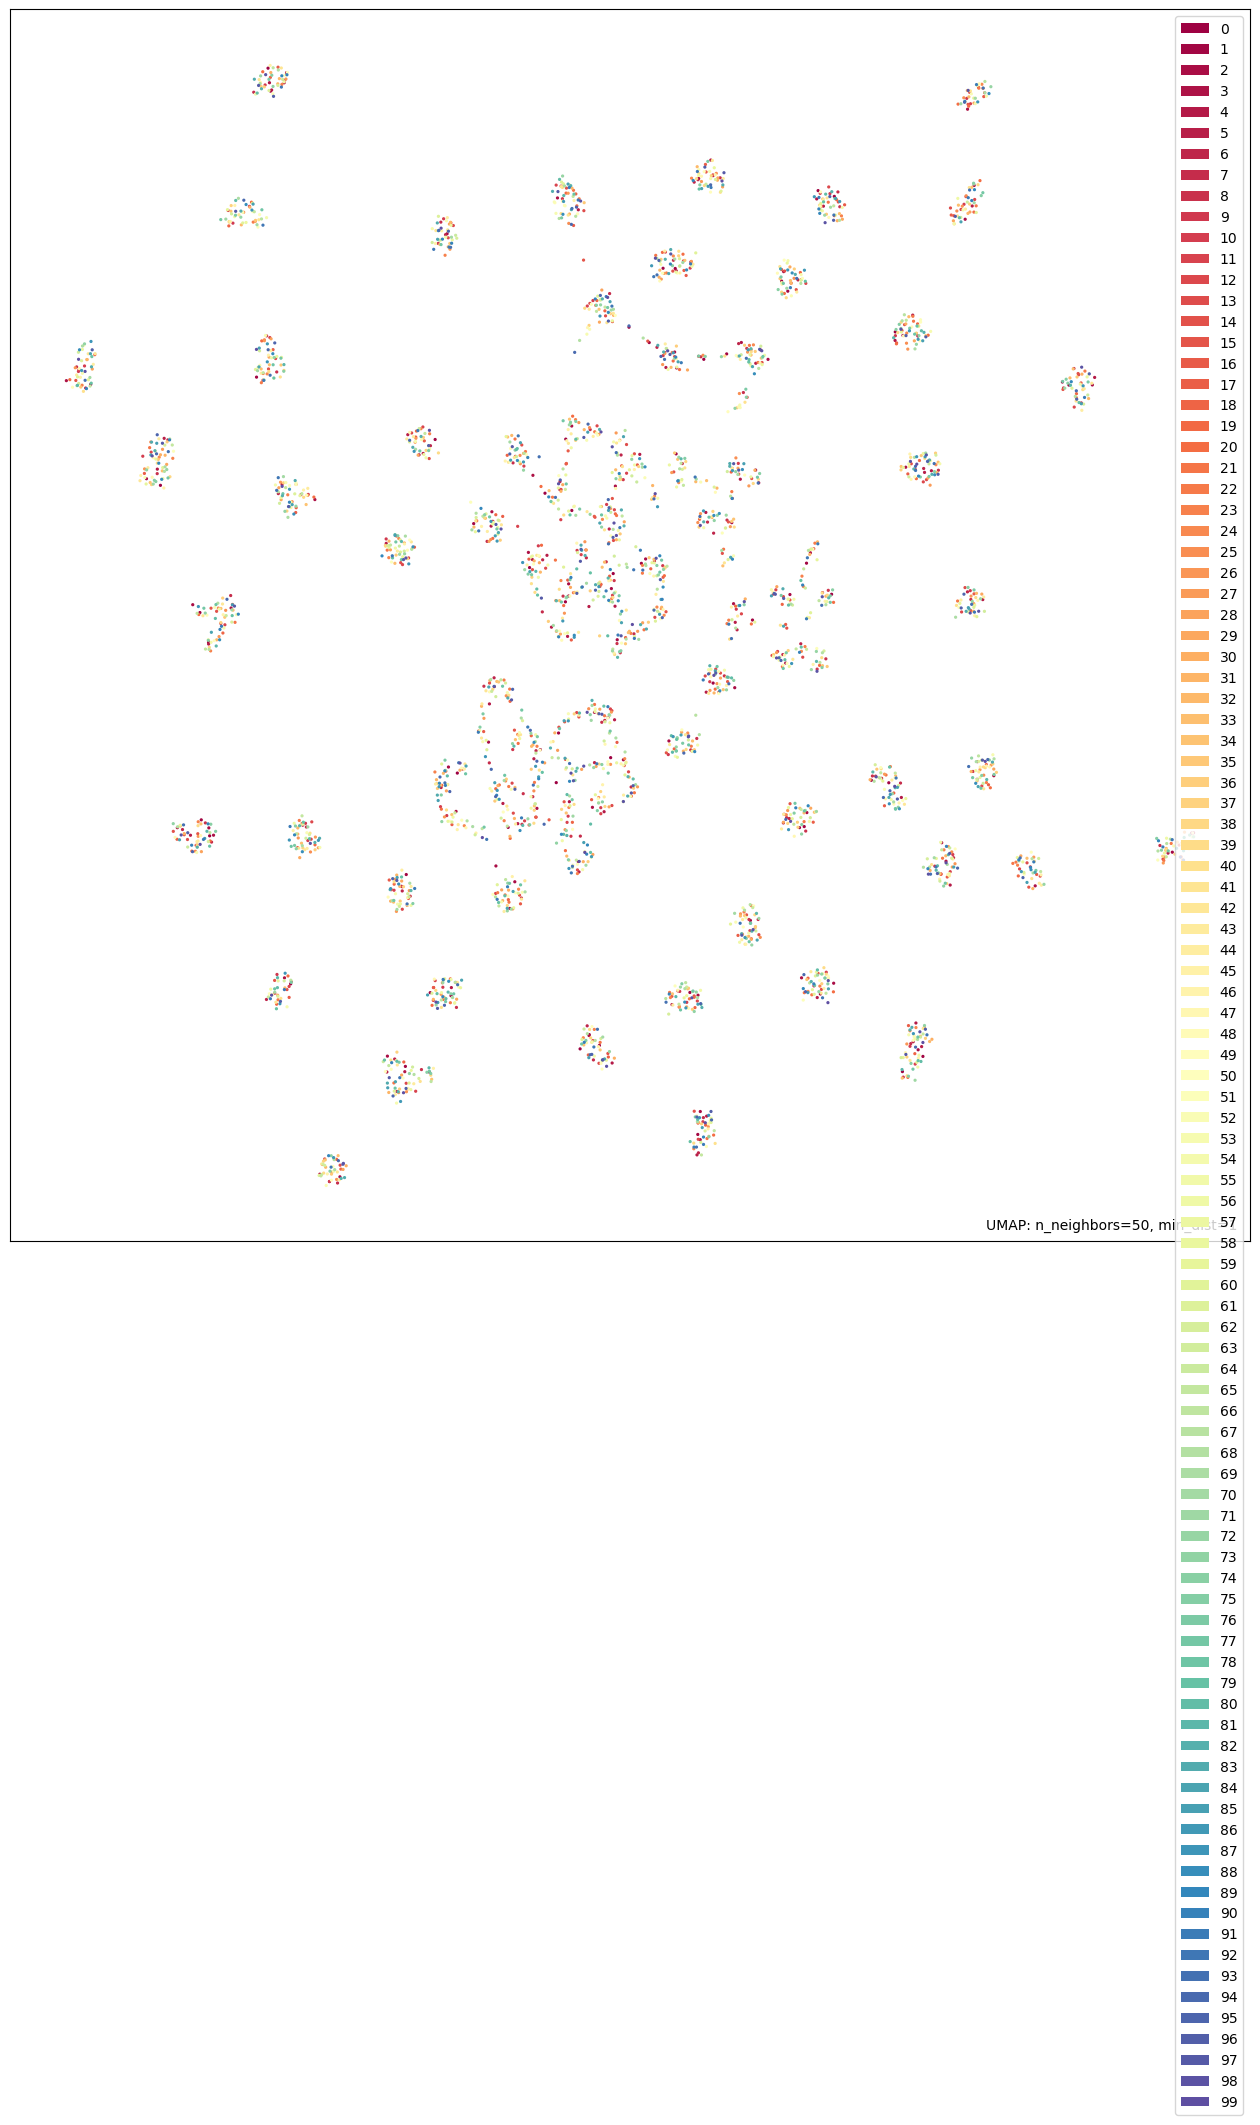

In [88]:
umap.plot.points(mapper, labels=iter_labels, width=1600, height=1600)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

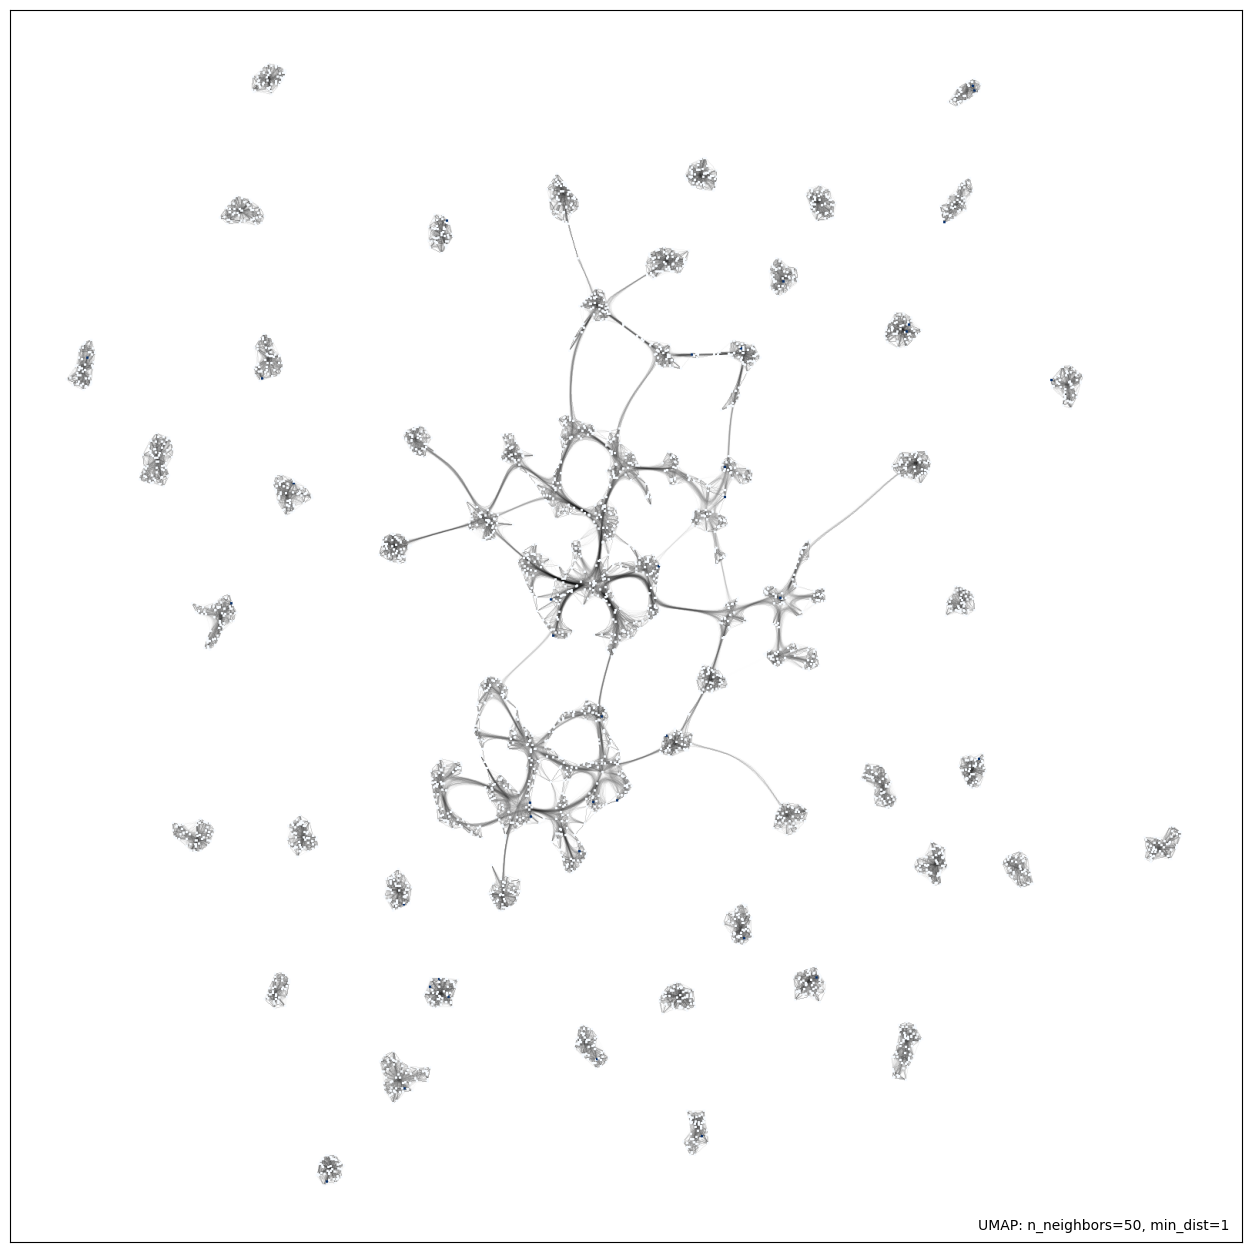

In [89]:
umap.plot.connectivity(mapper, show_points=True, edge_bundling="hammer", width=1600, height=1600)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

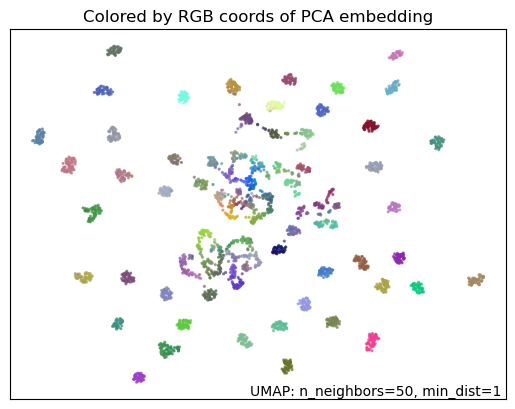

In [90]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: >

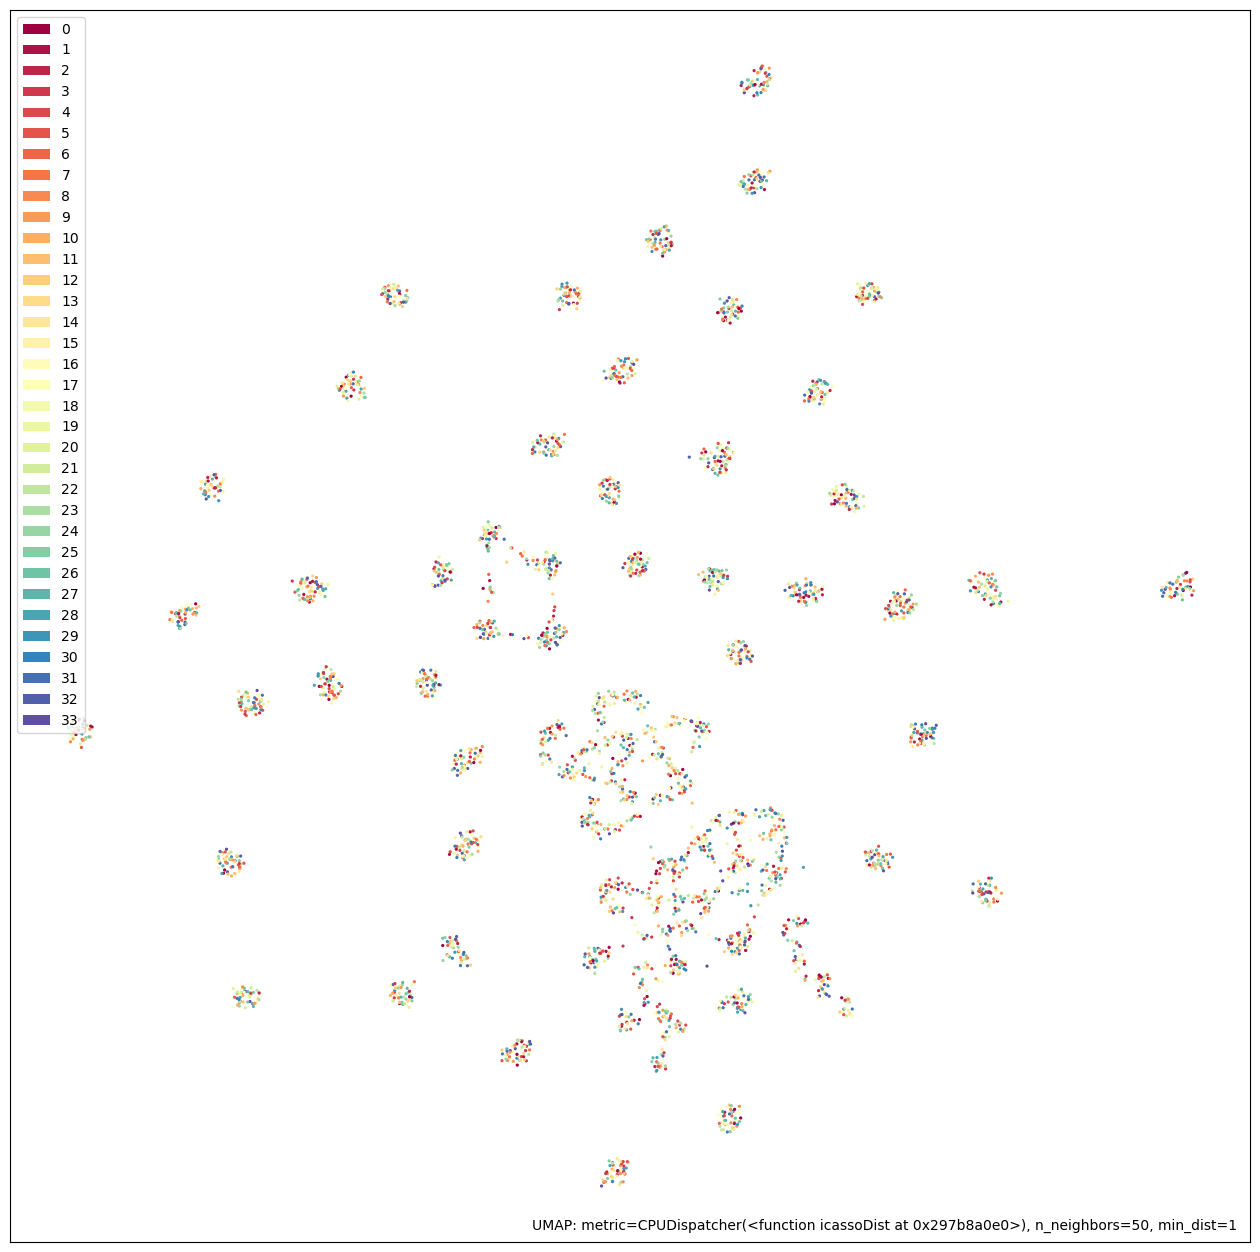

In [34]:
mapper2 = umap.UMAP(n_neighbors=50, min_dist=1, metric=icassoDist).fit(ss_mat.T)
umap.plot.points(mapper2, labels=comp_labels, width=1600, height=1600)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

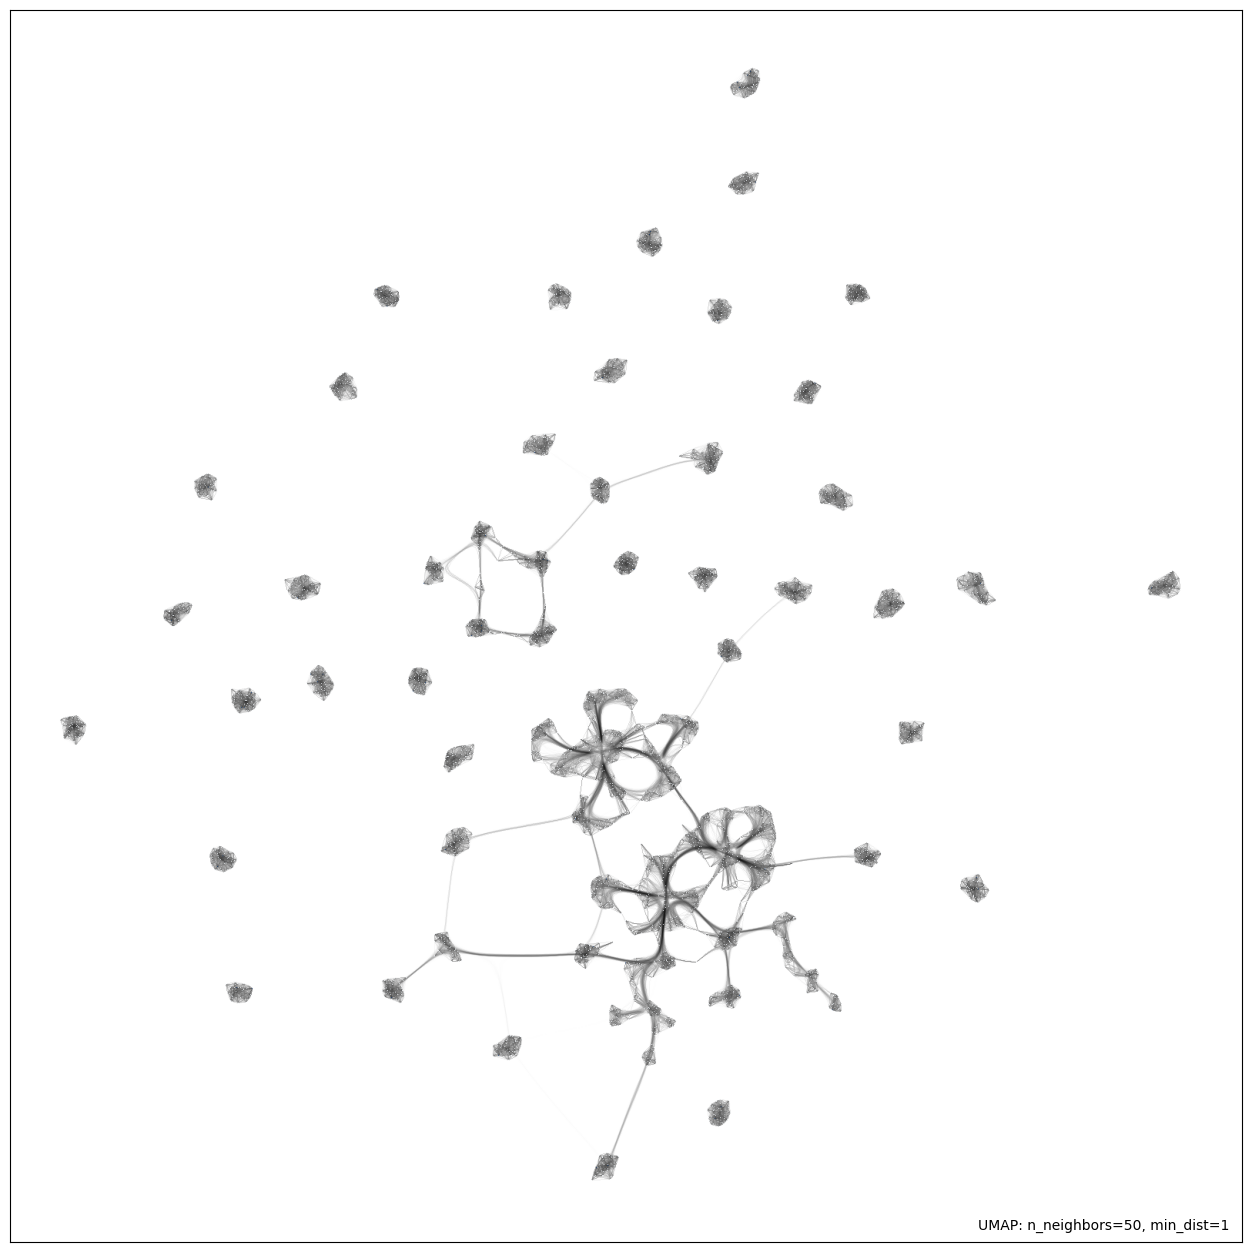

In [35]:
umap.plot.connectivity(mapper2, show_points=True, edge_bundling="hammer", width=1600, height=1600)

In [36]:
mapper3 = umap.UMAP(n_neighbors=50, min_dist=1, metric="precomputed").fit(mat_d)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


<Axes: >

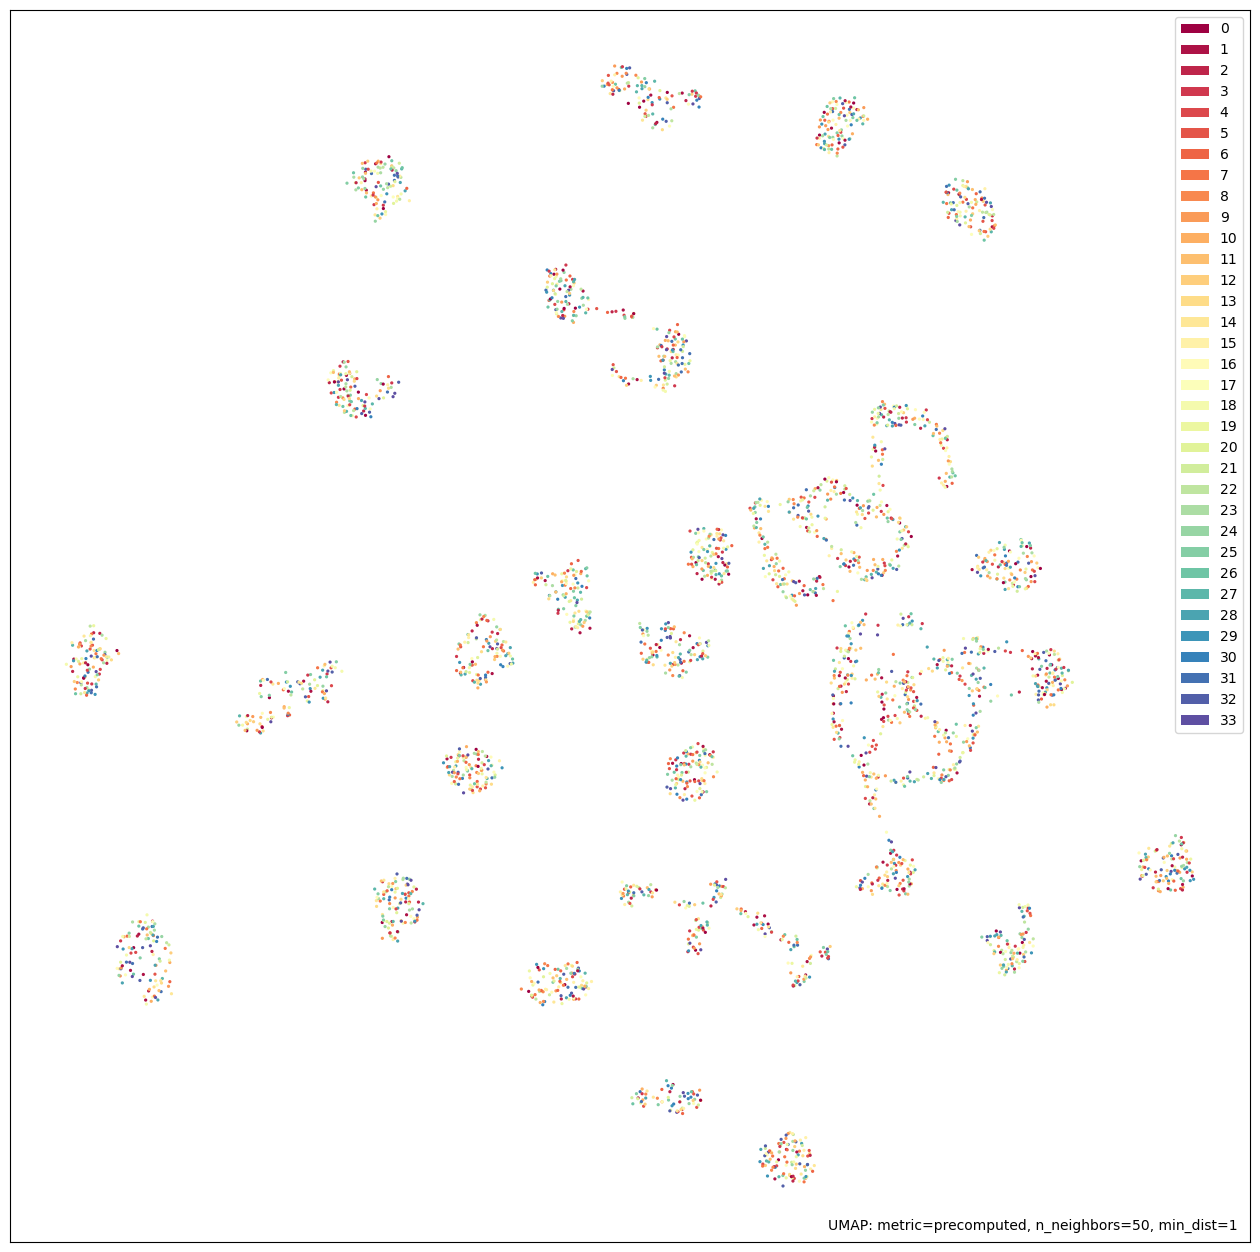

In [37]:
umap.plot.points(mapper3, width=1600, height=1600, labels=comp_labels)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

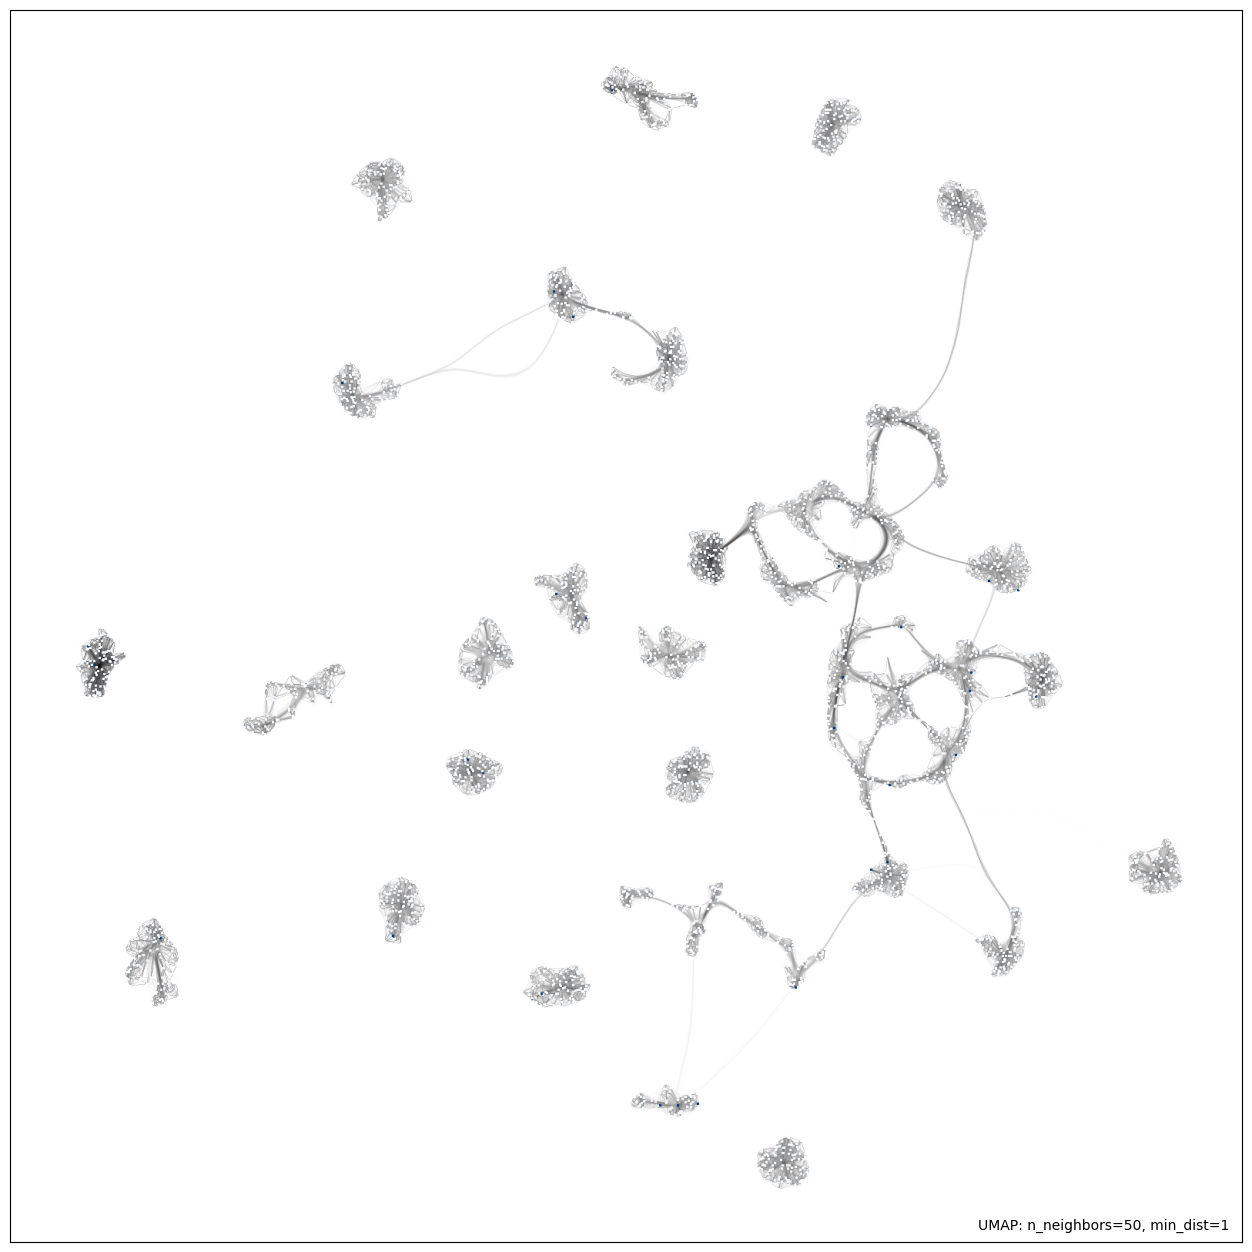

In [38]:
umap.plot.connectivity(mapper3, show_points=True, edge_bundling="hammer", width=1600, height=1600)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

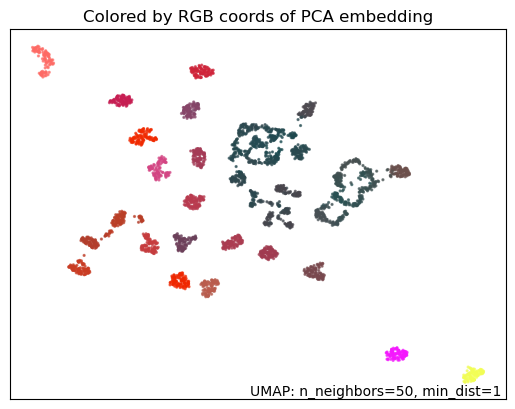

In [78]:
umap.plot.diagnostic(mapper3, diagnostic_type='pca', width=1600, height=1600)

# R ICA solutions

In [13]:
mat_d = pd.read_csv(join(dat_dir, 'mat_d.csv')).values

In [14]:
mat_d.shape

(1000, 1000)

In [15]:
mapper_r = umap.UMAP(n_neighbors=50, min_dist=1, metric="precomputed").fit(mat_d)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

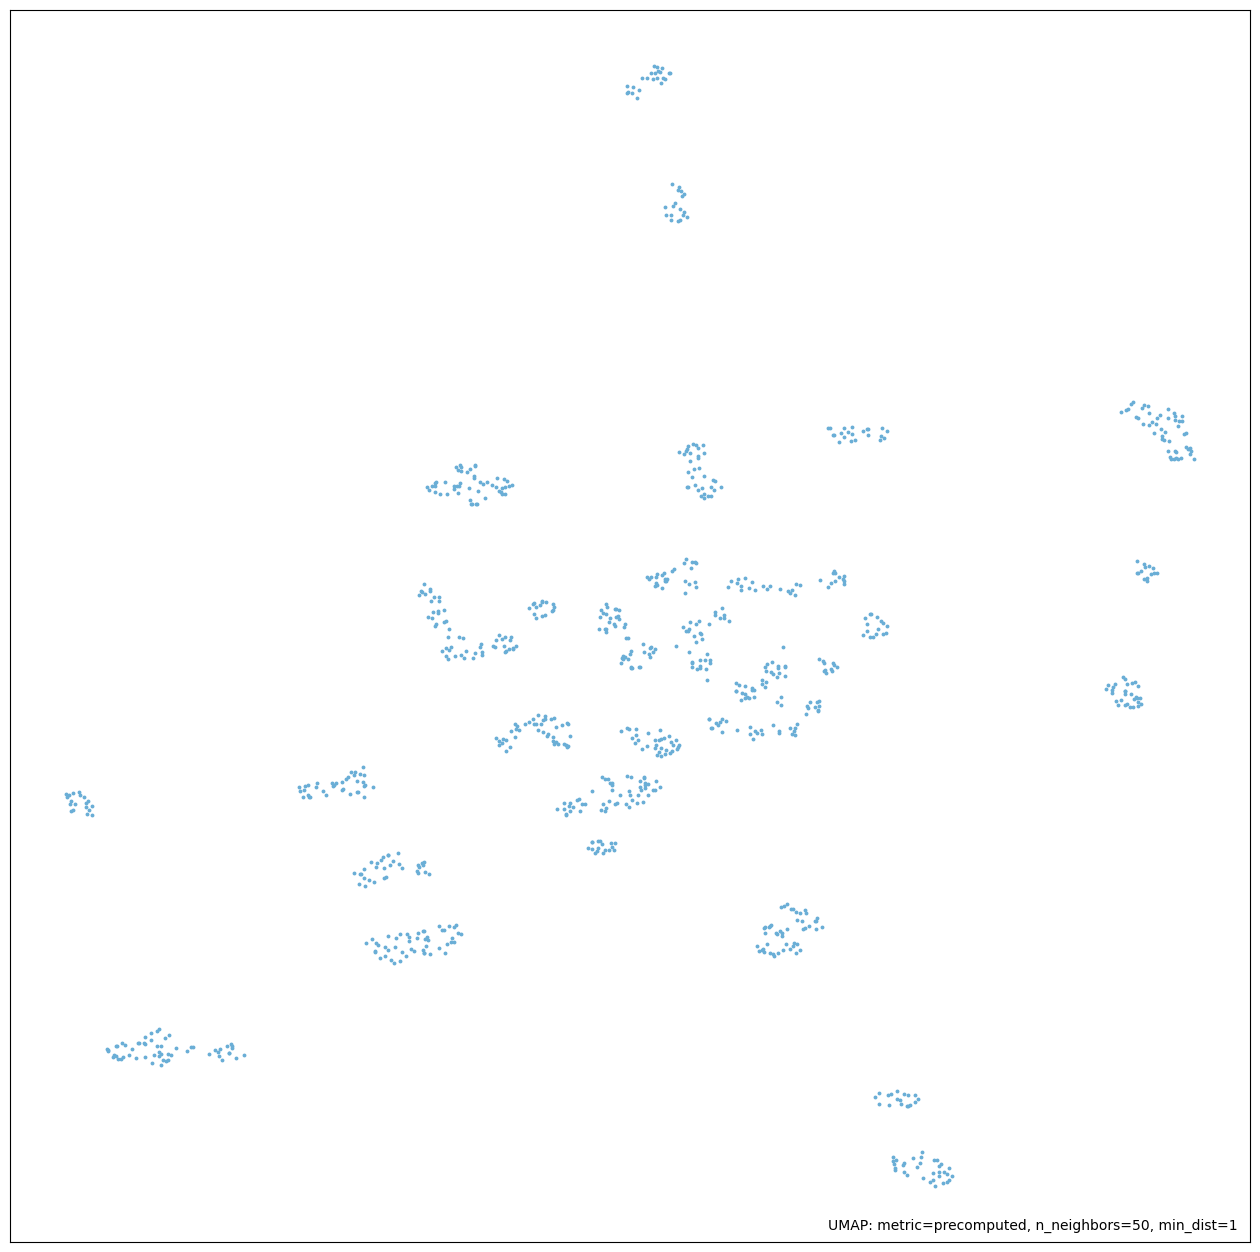

In [16]:
umap.plot.points(mapper_r, width=1600, height=1600)

/opt/homebrew/anaconda3/envs/autocorrelation/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

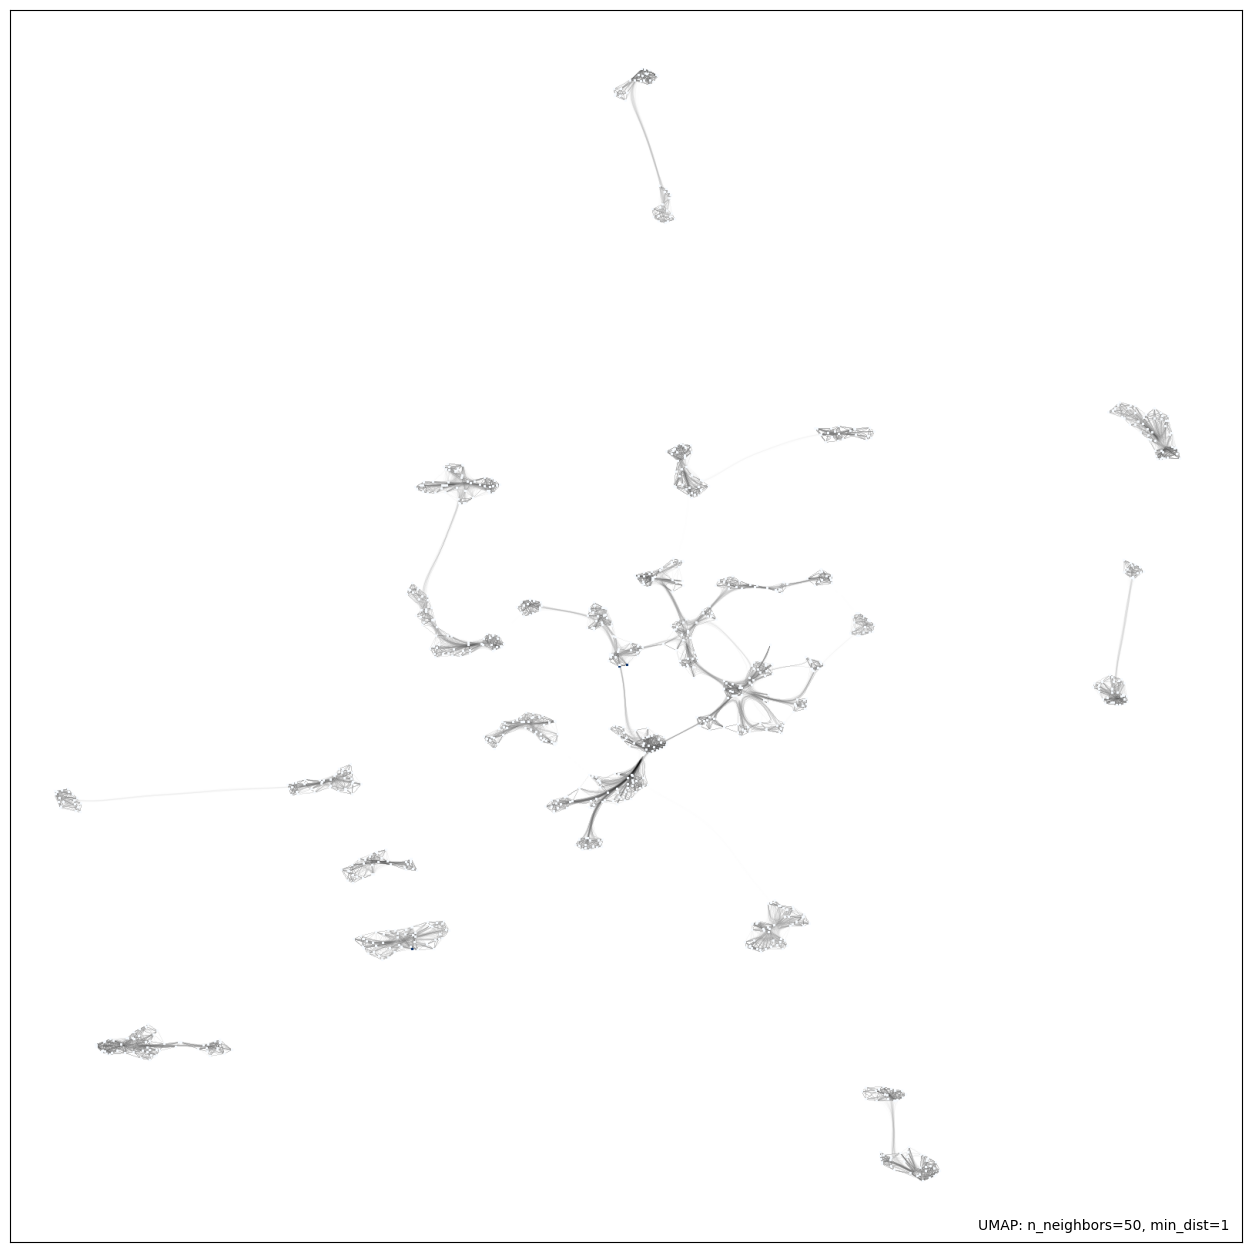

In [17]:
umap.plot.connectivity(mapper_r, show_points=True, edge_bundling="hammer", width=1600, height=1600)